# 01. EDA and Cleaning - Ames House Pricing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

## 1. Loading the data

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# Save test IDs for later submission
test_ID = test['Id']

## 2. Basic Exploration

In [4]:
# Dataset dimensions
train.shape

(2051, 81)

In [5]:
# First few rows
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
# Checking variable types
train.dtypes.value_counts()

object     42
int64      28
float64    11
Name: count, dtype: int64

In [7]:
# Summary statistics
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [8]:
# Standarizing column names
train.columns = train.columns.str.lower().str.replace(' ','_')

In [42]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [9]:
# Checking for missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
mas_vnr_type      1240
fireplace_qu      1000
lot_frontage       330
garage_yr_blt      114
garage_cond        114
garage_qual        114
garage_finish      114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_qual           55
bsmtfin_type_1      55
bsmt_cond           55
mas_vnr_area        22
bsmt_half_bath       2
bsmt_full_bath       2
bsmtfin_sf_1         1
garage_cars          1
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
dtype: int64

<Axes: >

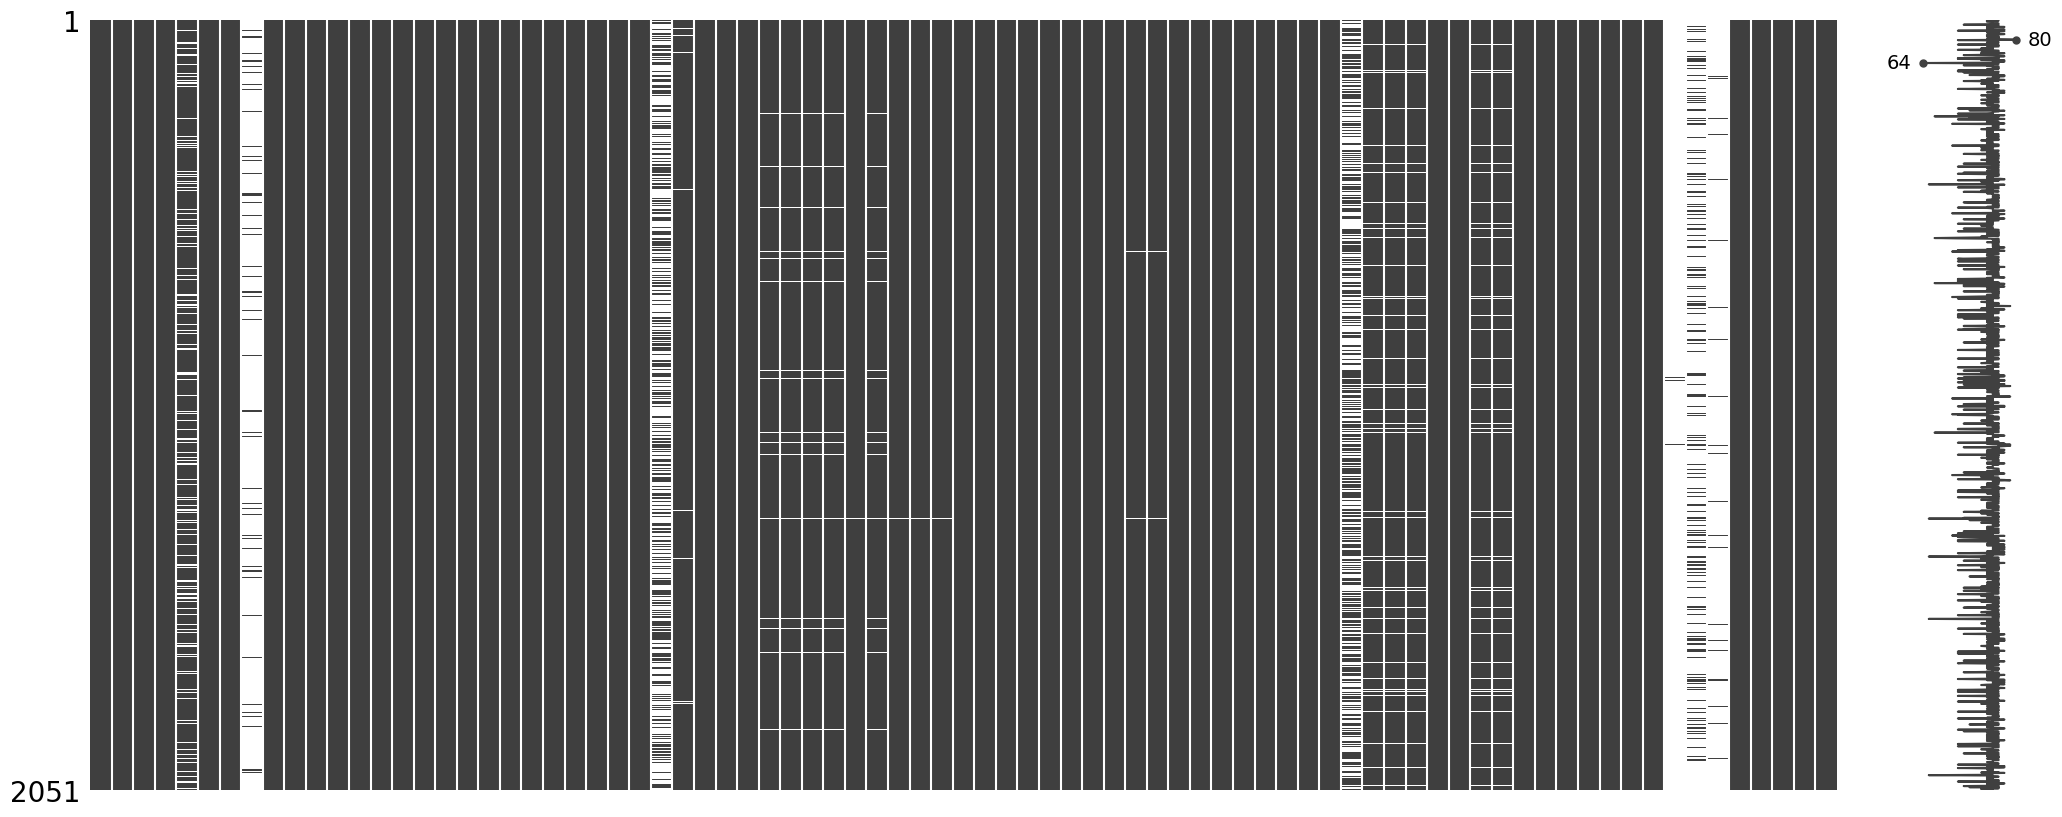

In [10]:
msno.matrix(train)

**Findings**
- Several features have significant missing values (lot_frontage, garage_yr_blt, etc.)
- The data contains a mix of nominal, ordinal, and continuous variables

## 3. Analysis of Target Variable

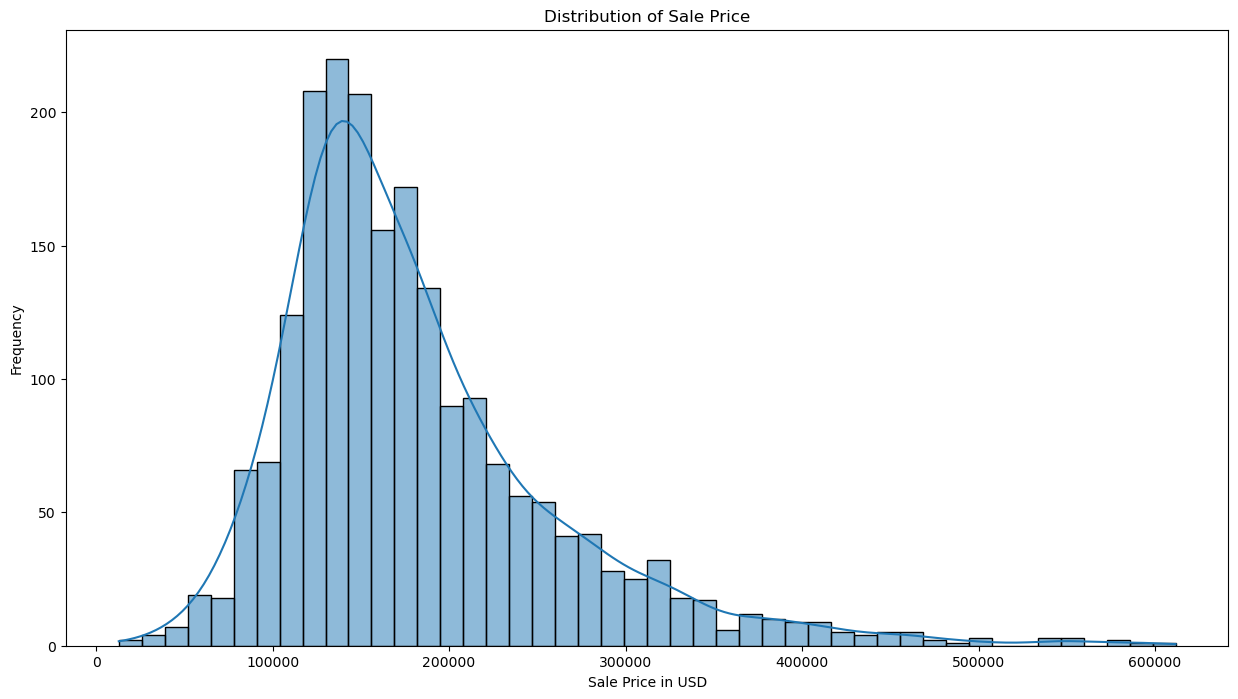

In [11]:
# Distribution of Sale Price
plt.figure(figsize=(15,8))
sns.histplot(train['saleprice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price in USD')
plt.ylabel('Frequency')
plt.show()

### 3.1 Basic Statistics of Sale Price

In [12]:
# Sale Price Statistics
train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [13]:
# Skewness
train['saleprice'].skew()

# with a skewness > 0 The data is positively skewed (right skewed). 
# We can observe the right tail of the distribution is longer.

1.5575514385863427

In [14]:
# Kurtosis
train['saleprice'].kurt()

# Kurtosis > 3: meaning 'saleprice' has heavier tails 
# (more outliers) than a normal distribution.

3.579003386146362

### 3.2 Log Transformation of Sale Price

In [15]:
# Applying log transformation technique to the target variable to address skewness
# Applying a log transformation can reduce skewness and make the distribution more symmetric (more normal)
# which aligns better with the assumptions of linear regression

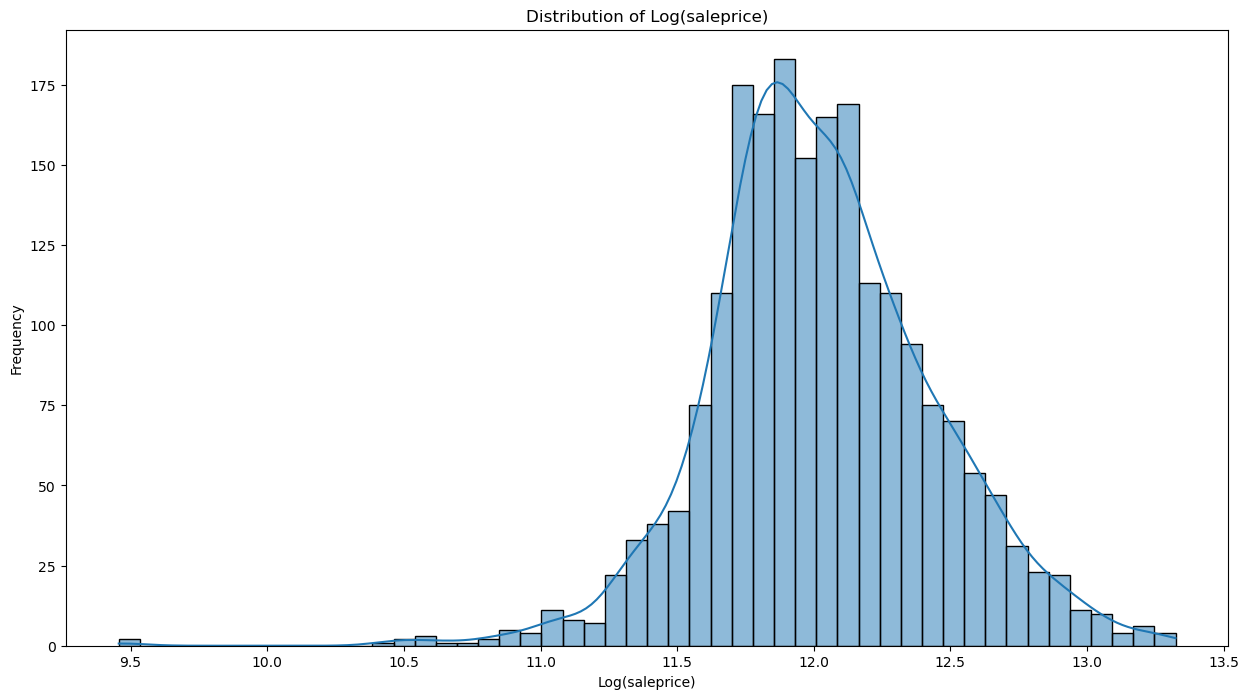

In [16]:
plt.figure(figsize=(15,8))
sns.histplot(np.log1p(train['saleprice']), kde=True)
plt.title('Distribution of Log(saleprice)')
plt.xlabel('Log(saleprice)')
plt.ylabel('Frequency')
plt.show()

### 3.3 Boxplot of 'saleprice' for outlier detection

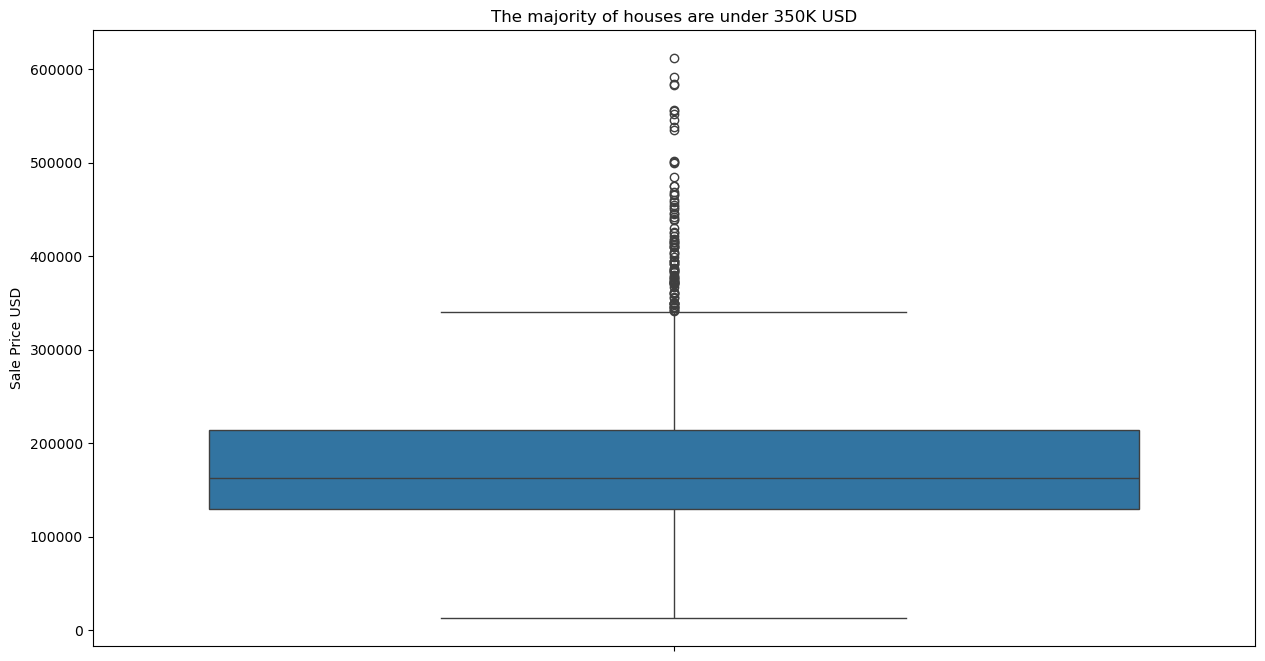

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(y=train['saleprice'])
plt.title('The majority of houses are under 350K USD')
plt.ylabel('Sale Price USD')
plt.show()

**Findings**
- Sale prices range form USD 34,900 to USD 755,000
- Log transformation creates more normal distribution
- Several high-priced outliers might influence model performance

## 4. Correlation Analysis with Numeric Features

In [18]:
# Selecting numeric features
numeric_features = train.select_dtypes(include=['int64','float64']).columns

In [19]:
# Calculating correlation with Sale Price
correlations = train[numeric_features].corr()
correlations_ordered = train[numeric_features].corr()['saleprice'].sort_values(ascending=False)

In [20]:
# Top 15 correlations with Sale Price
correlations_ordered.head(15)

saleprice         1.000000
overall_qual      0.800207
gr_liv_area       0.697038
garage_area       0.650270
garage_cars       0.648220
total_bsmt_sf     0.628925
1st_flr_sf        0.618486
year_built        0.571849
year_remod/add    0.550370
full_bath         0.537969
garage_yr_blt     0.533922
mas_vnr_area      0.512230
totrms_abvgrd     0.504014
fireplaces        0.471093
bsmtfin_sf_1      0.423519
Name: saleprice, dtype: float64

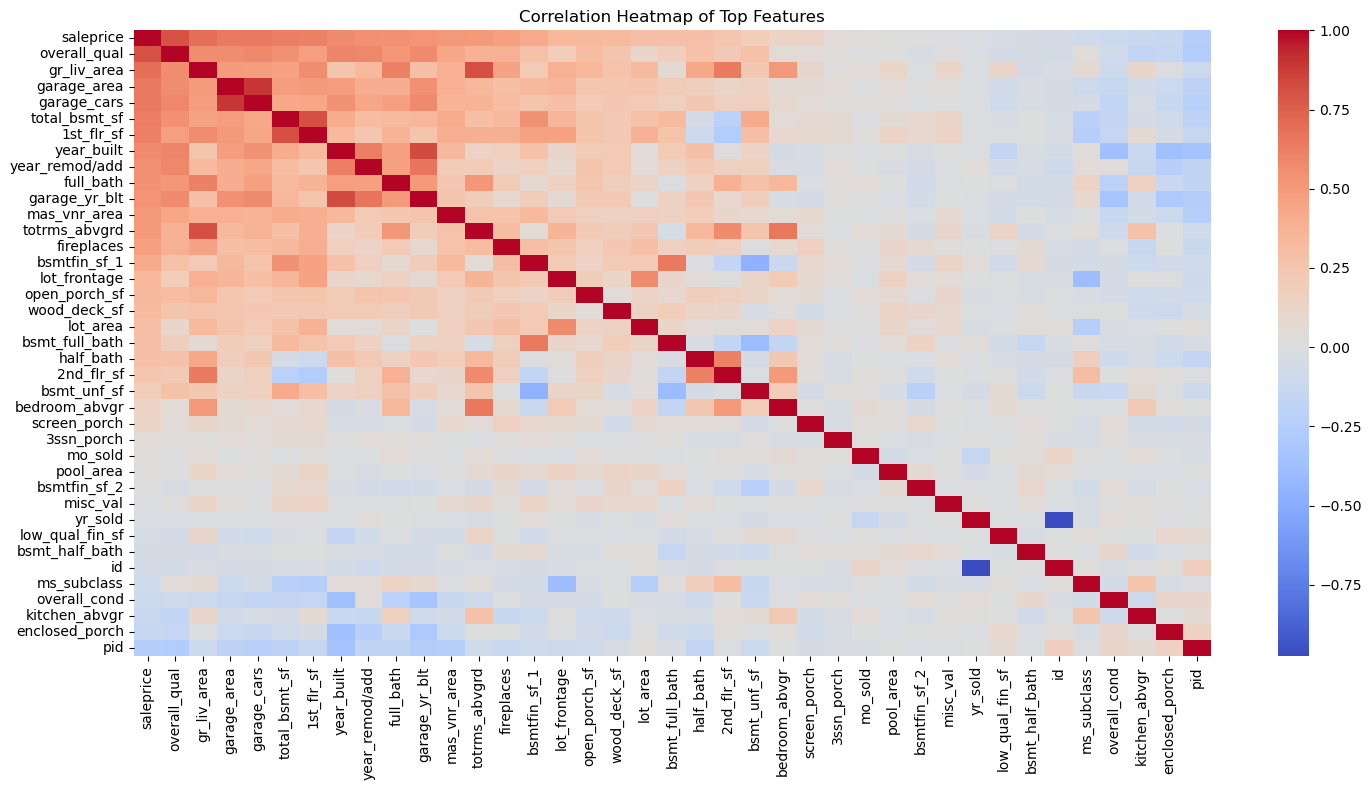

In [21]:
# correlation heatmap for top features
plt.figure(figsize=(15,8))
top_corr_features = correlations_ordered.index
top_corr_matrix = train[top_corr_features].corr()
sns.heatmap(top_corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.tight_layout()
plt.show()

# This does not help to much, as everything is too tight. Let's get to the top features
# that have a higher correlation to the target variable saleprice

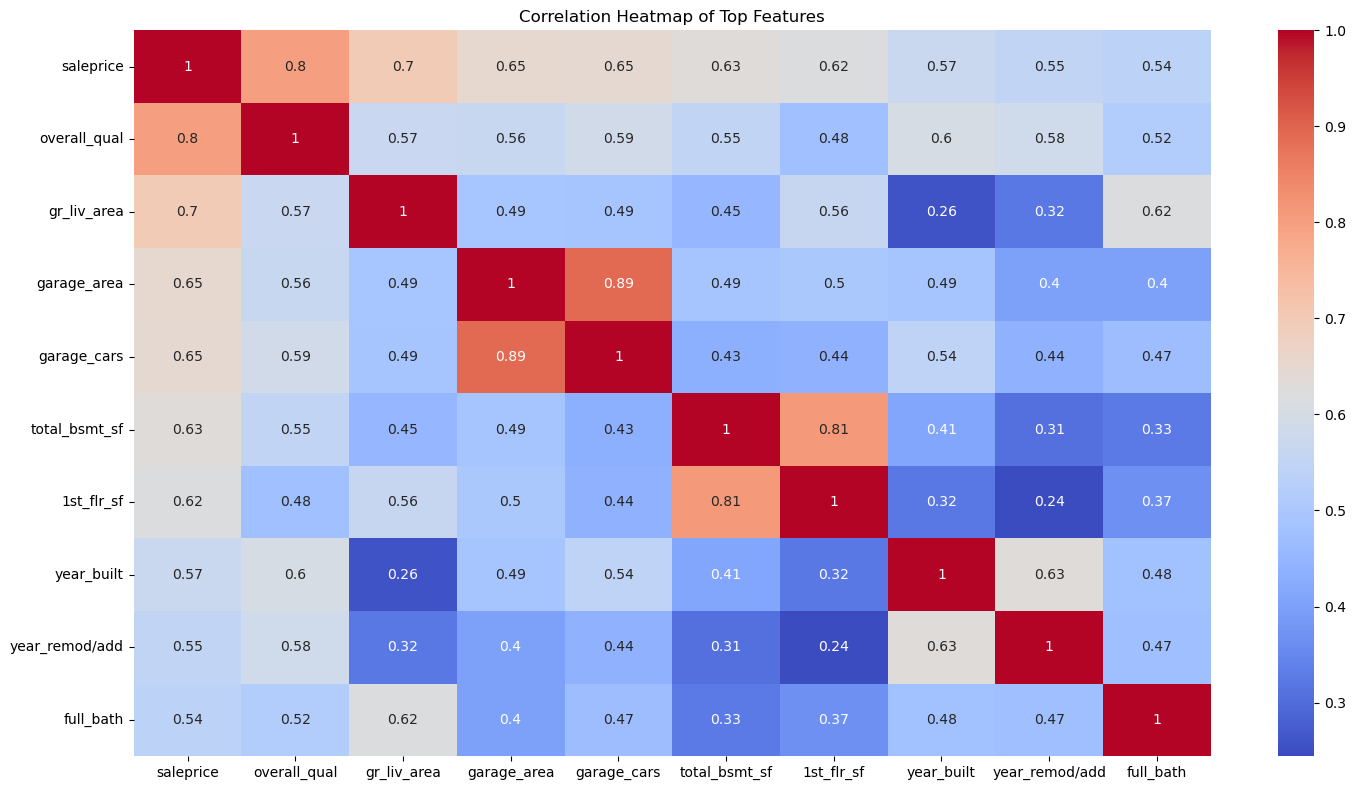

In [22]:
# Correlation map for top features
plt.figure(figsize=(15, 8))
top_corr_features = correlations_ordered.index[:10]  # Top 10 correlated features
top_corr_matrix = train[top_corr_features].corr()
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.tight_layout()
plt.show()

# clearly here overall_qual has a strong correlation to saleprice

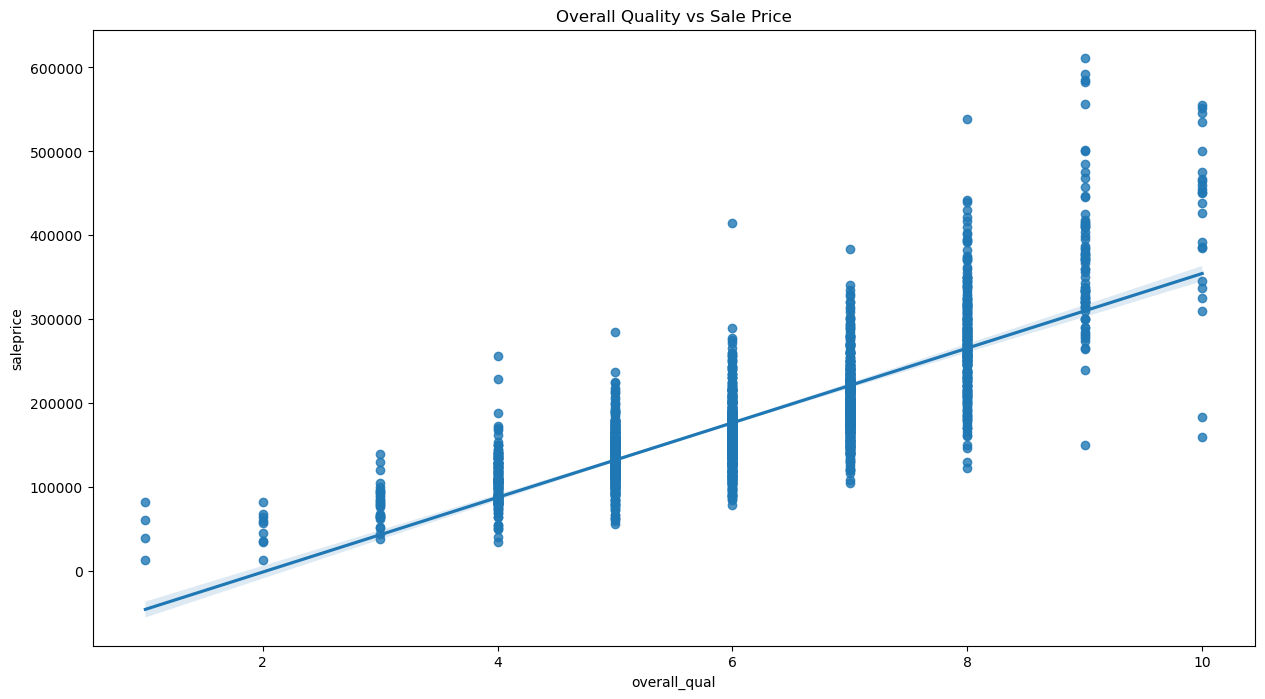

In [23]:
# Scatterplot of top correlated feature vs saleprice
plt.figure(figsize=(15,8))
sns.regplot(x='overall_qual', y='saleprice', data=train)
plt.title('Overall Quality vs Sale Price')
plt.show()

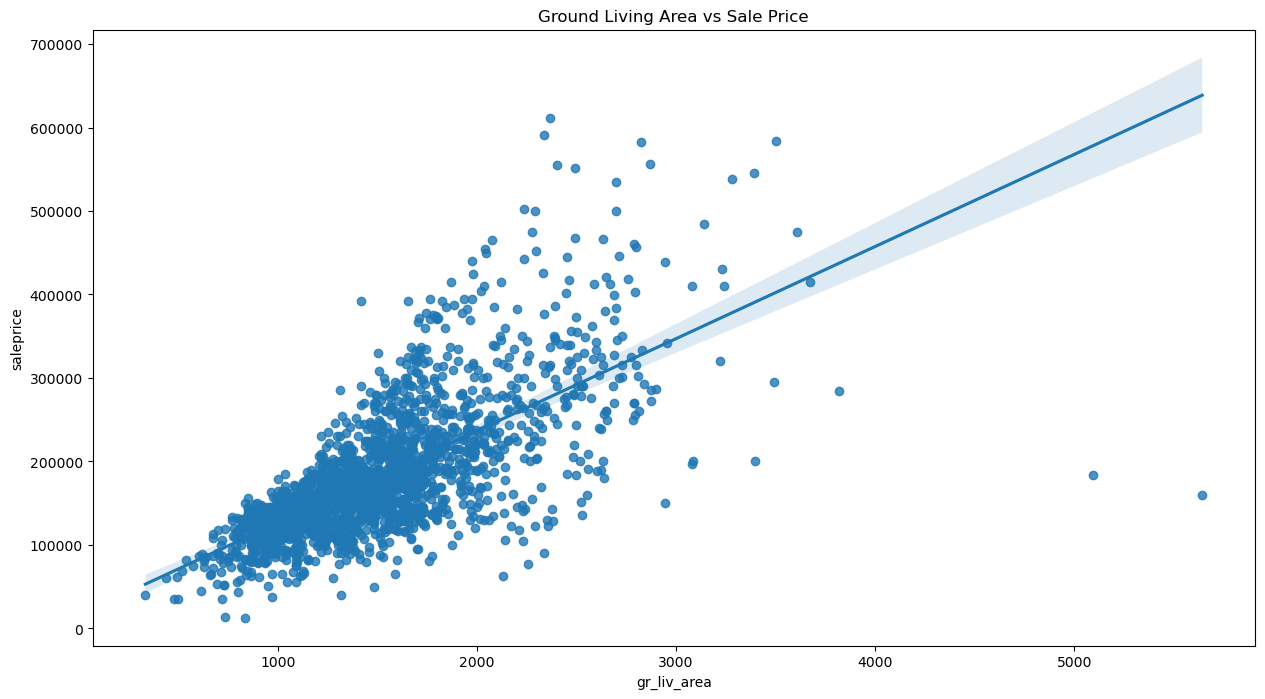

In [40]:
# Scatterplot of top correlated feature vs saleprice
plt.figure(figsize=(15,8))
sns.regplot(x='gr_liv_area', y='saleprice', data=train)
plt.title('Ground Living Area vs Sale Price')
plt.show()

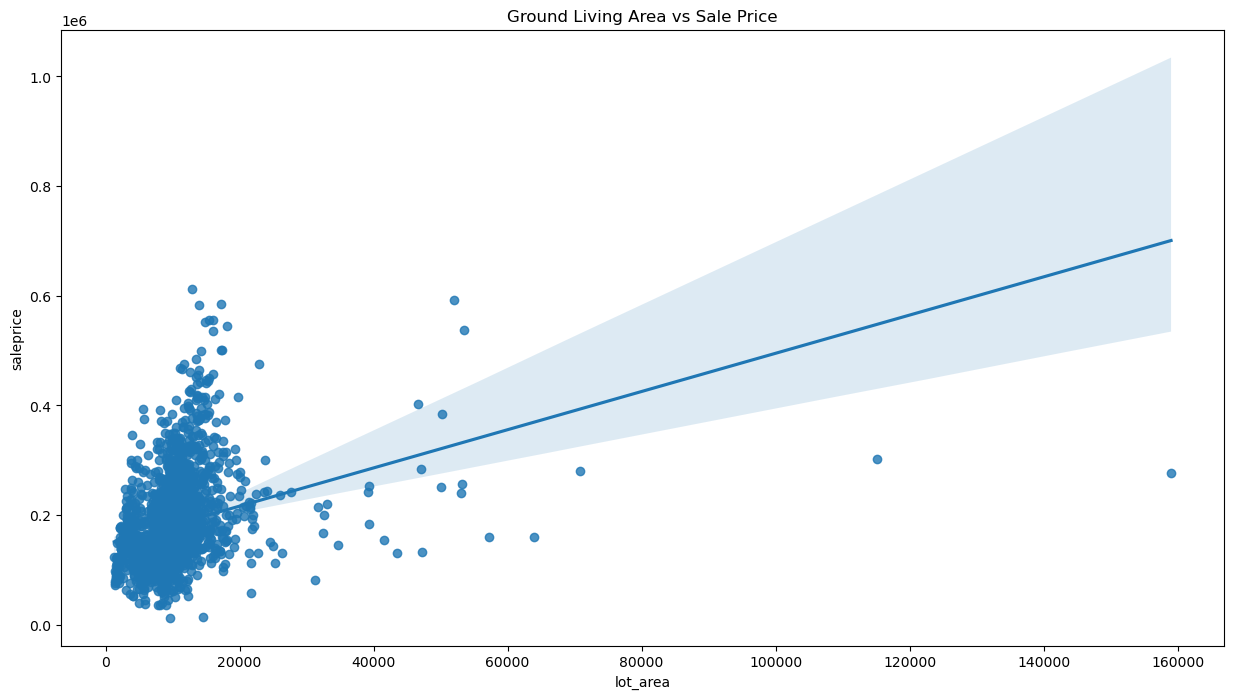

In [41]:
# Scatterplot of top correlated feature vs saleprice
plt.figure(figsize=(15,8))
sns.regplot(x='lot_area', y='saleprice', data=train)
plt.title('Ground Living Area vs Sale Price')
plt.show()

**Findings**
- Overall Quality (overall_qual) shows strongest correlation (~0.80)
- Above Ground Living Area (gr_liv_area) strongly correlated (~0.71)
- Garage Cars (garage_cars), Total Basement SF(total_bsmt_sf), and 1st Floor SF (1st_flr_sf) also highly correlated
- Several features showing high multicolinearity (e.g. garage_cars and garage_area at ~0.88)

## 5. Categorical Variable Analysis

In [24]:
# Creating a function to plot categorical features
def plot_categorical(feature, top_n=10):
    if train[feature].nunique() > top_n:
        # for features with many categories, show only top N
        # put the plot in order by median value of the feature
        top_categories = train.groupby(feature)['saleprice'].median().sort_values(ascending=False).index[:top_n]
        data = train[train[feature].isin(top_categories)]
    else:
        data = train

    plt.figure(figsize=(12,6))
    order = data.groupby(feature)['saleprice'].median().sort_values(ascending=False).index
    sns.boxplot(x=feature, y='saleprice', data=data, order=order)
    plt.title(f'{feature.title()} vs Sale Price')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # print average price by category
    avg_price = data.groupby(feature)['saleprice'].mean().sort_values(ascending=False)
    print(f'Average price {feature}')
    print(avg_price)

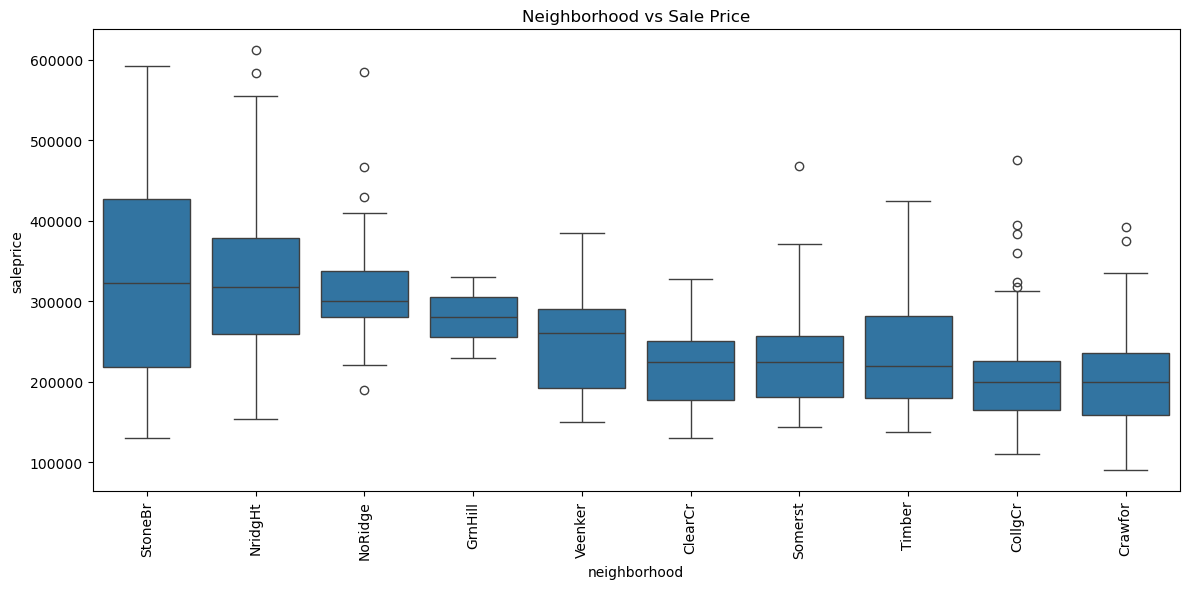

Average price neighborhood
neighborhood
StoneBr    329675.736842
NridgHt    322831.352459
NoRidge    316294.125000
GrnHill    280000.000000
Veenker    253570.588235
Timber     241051.354167
Somerst    227183.900000
ClearCr    217490.074074
Crawfor    205901.211268
CollgCr    202497.216667
Name: saleprice, dtype: float64


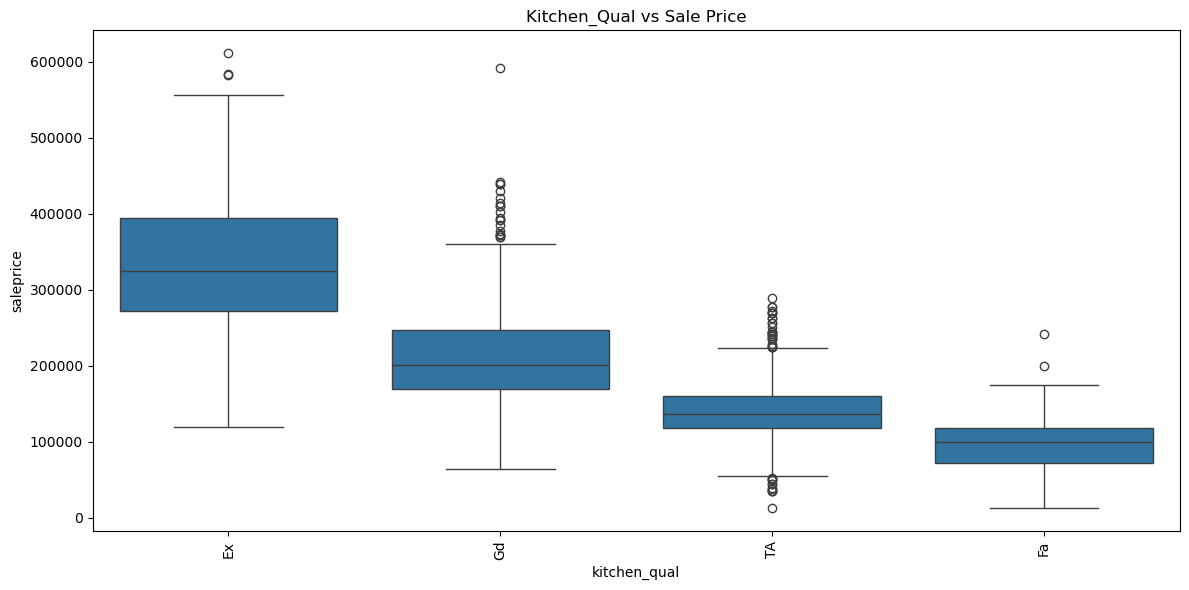

Average price kitchen_qual
kitchen_qual
Ex    336424.463576
Gd    211629.451613
TA    139501.607450
Fa    101334.957447
Name: saleprice, dtype: float64


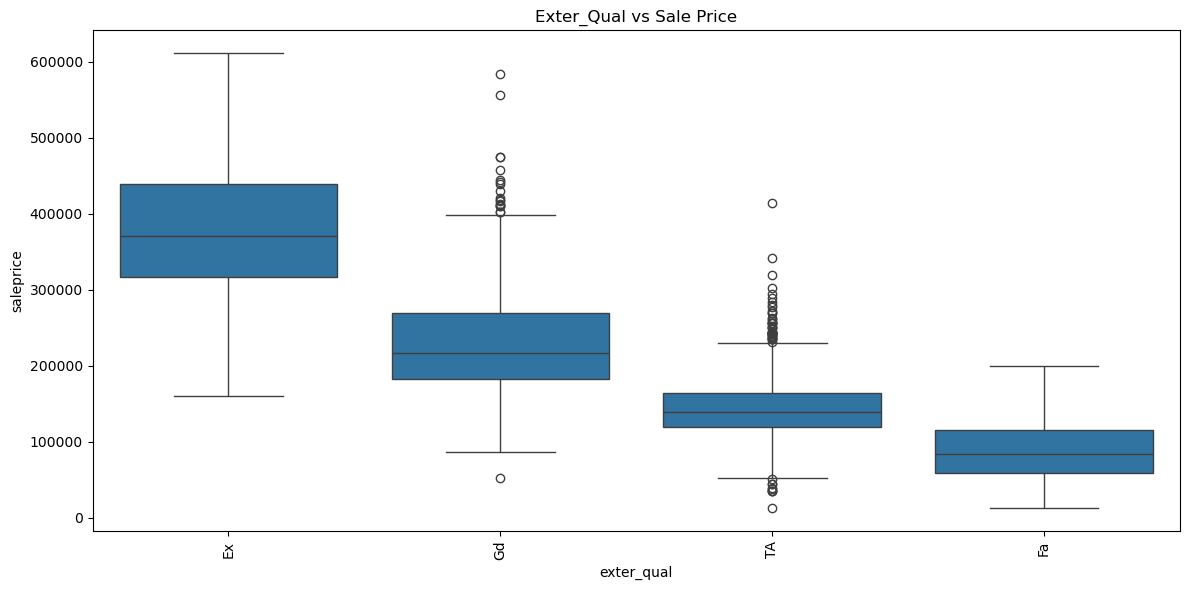

Average price exter_qual
exter_qual
Ex    374460.308642
Gd    230802.484935
TA    143270.978348
Fa     89801.192308
Name: saleprice, dtype: float64


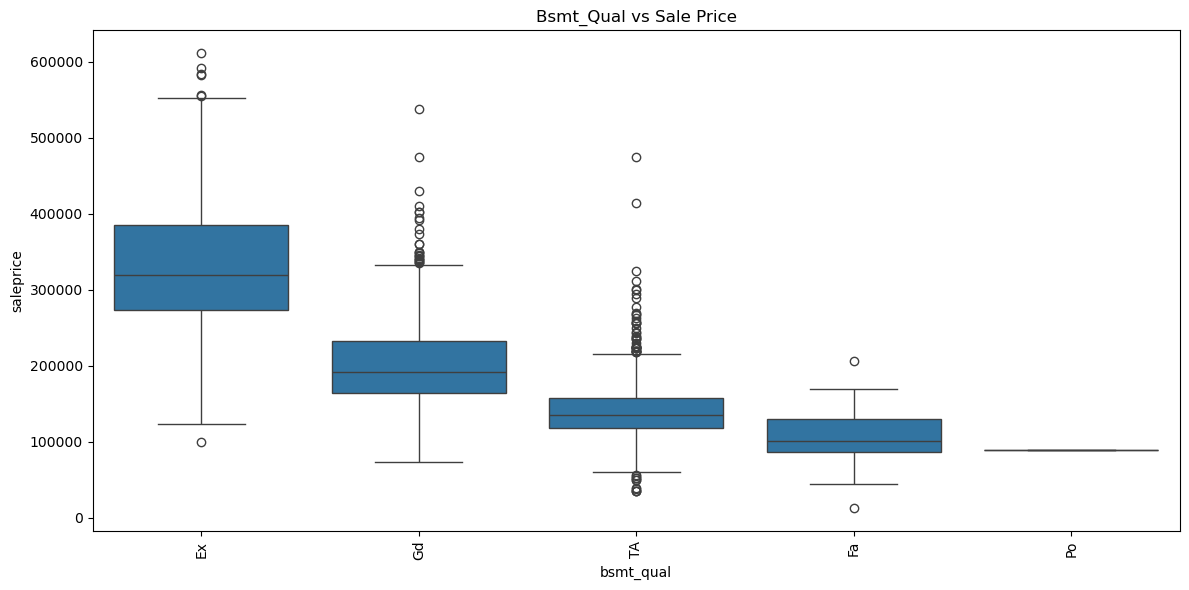

Average price bsmt_qual
bsmt_qual
Ex    329506.619565
Gd    202537.582176
TA    139988.461105
Fa    107752.166667
Po     89000.000000
Name: saleprice, dtype: float64


In [25]:
# Example for categorical variables
important_categoricals = ['neighborhood','kitchen_qual','exter_qual','bsmt_qual']
for feature in important_categoricals:
    plot_categorical(feature)

In [26]:
from scipy import stats

def anova_test(feature):
    data = train.dropna(subset=[feature])
    categories = data[feature].unique()
    samples = [data[data[feature] == category]['saleprice'] for category in categories]
    f_stat, p_value = stats.f_oneway(*samples)
    print(f'{feature}: F-statistics = {f_stat:.2f}, p-value = {p_value:.6f}')

for feature in important_categoricals:
    anova_test(feature)

neighborhood: F-statistics = 102.87, p-value = 0.000000
kitchen_qual: F-statistics = 696.41, p-value = 0.000000
exter_qual: F-statistics = 751.88, p-value = 0.000000
bsmt_qual: F-statistics = 504.39, p-value = 0.000000


**Findings**
- Neighborhood explains significant price variation (F-statistic > 50)
- Kitchen Quality shows strong relationship with price
- Exterior Quality and Basement Quality also significant
- Some categorical features have too many levels or sparse representation

## 6. What if Log or Square Transformation Improves Linearity?  - Bivariate Relationship Visualization

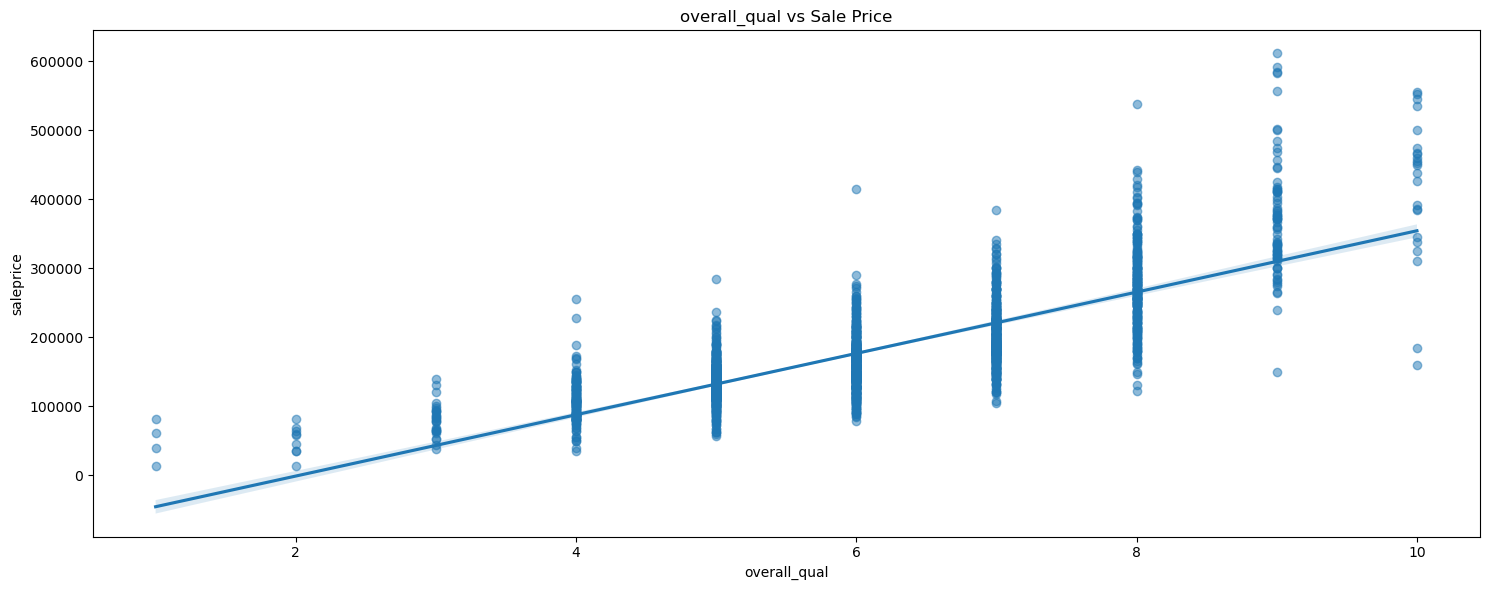

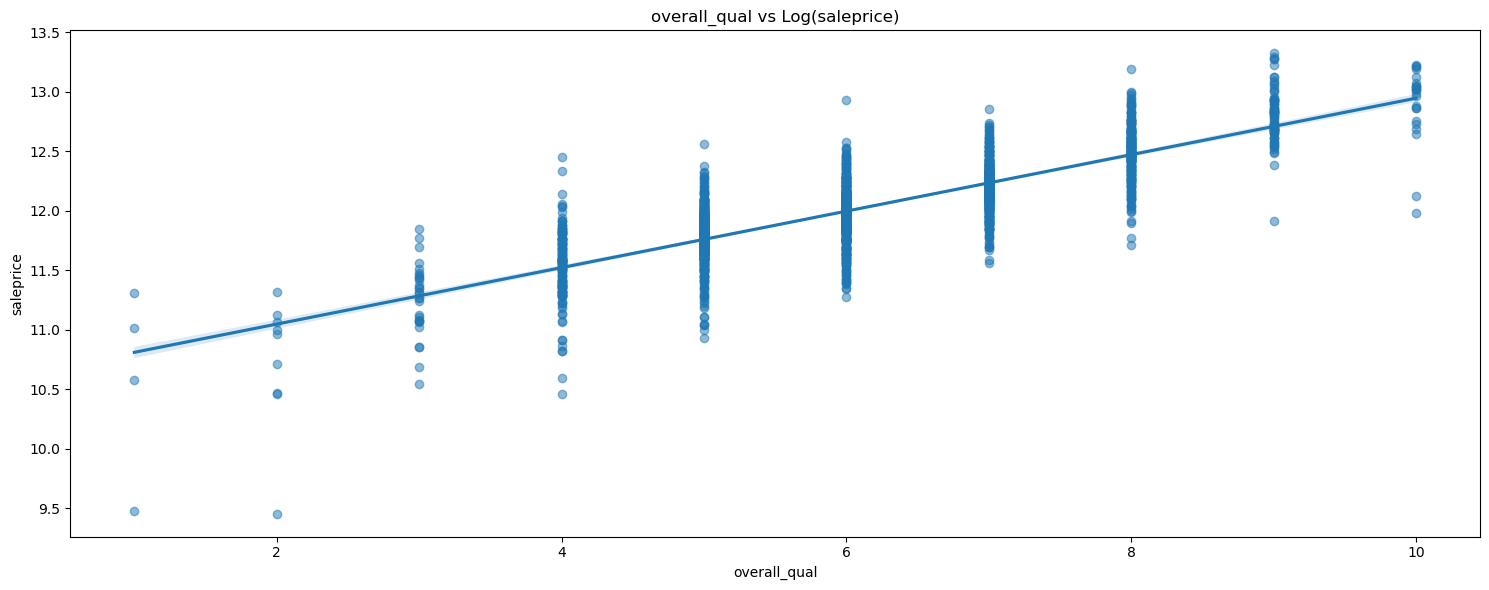

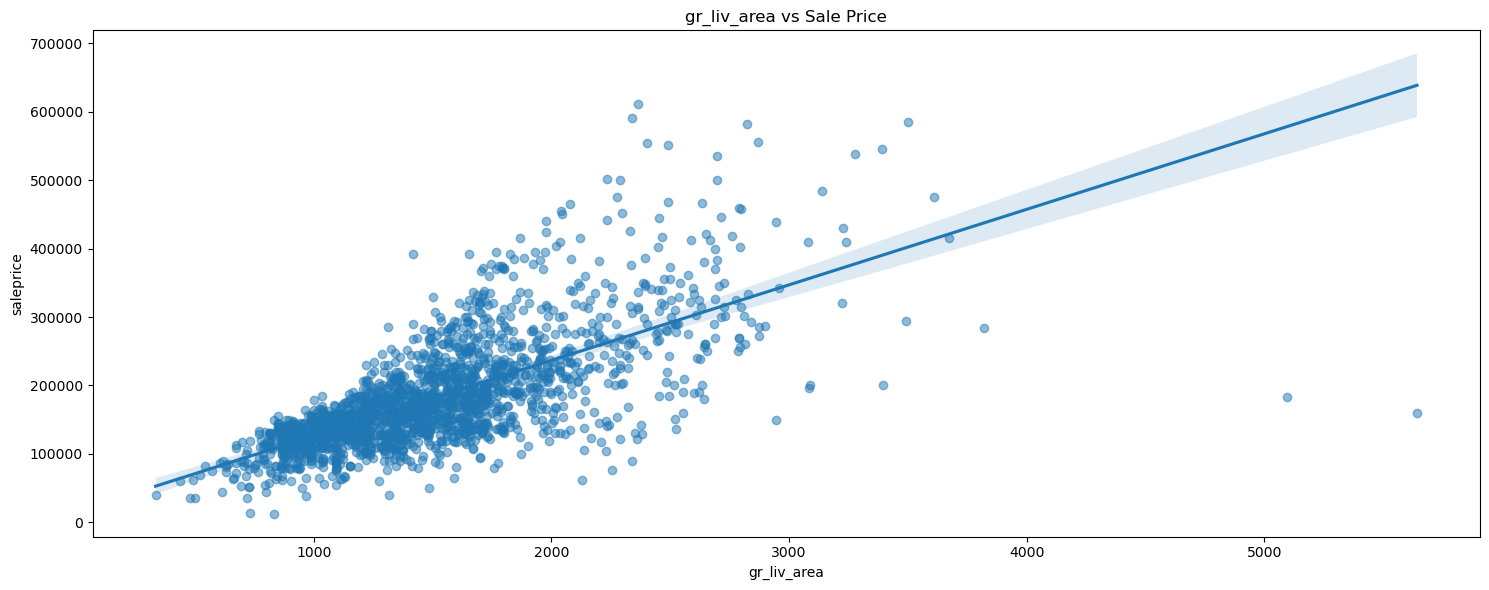

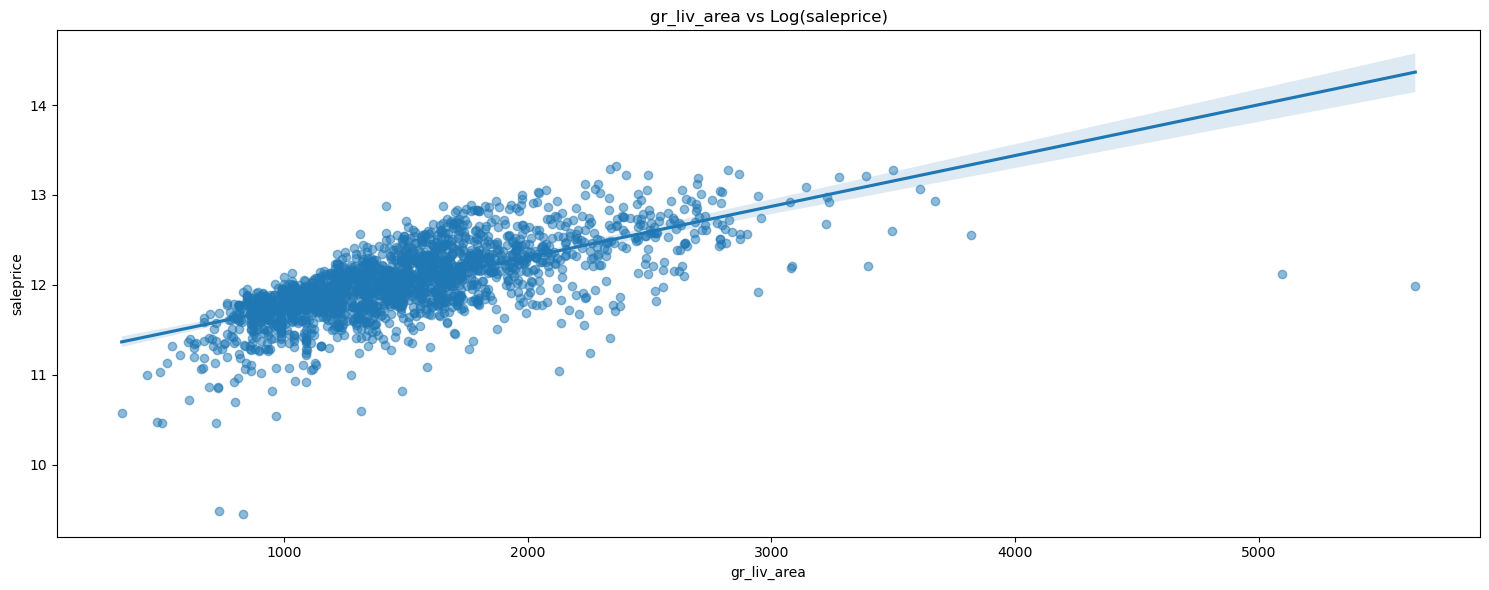

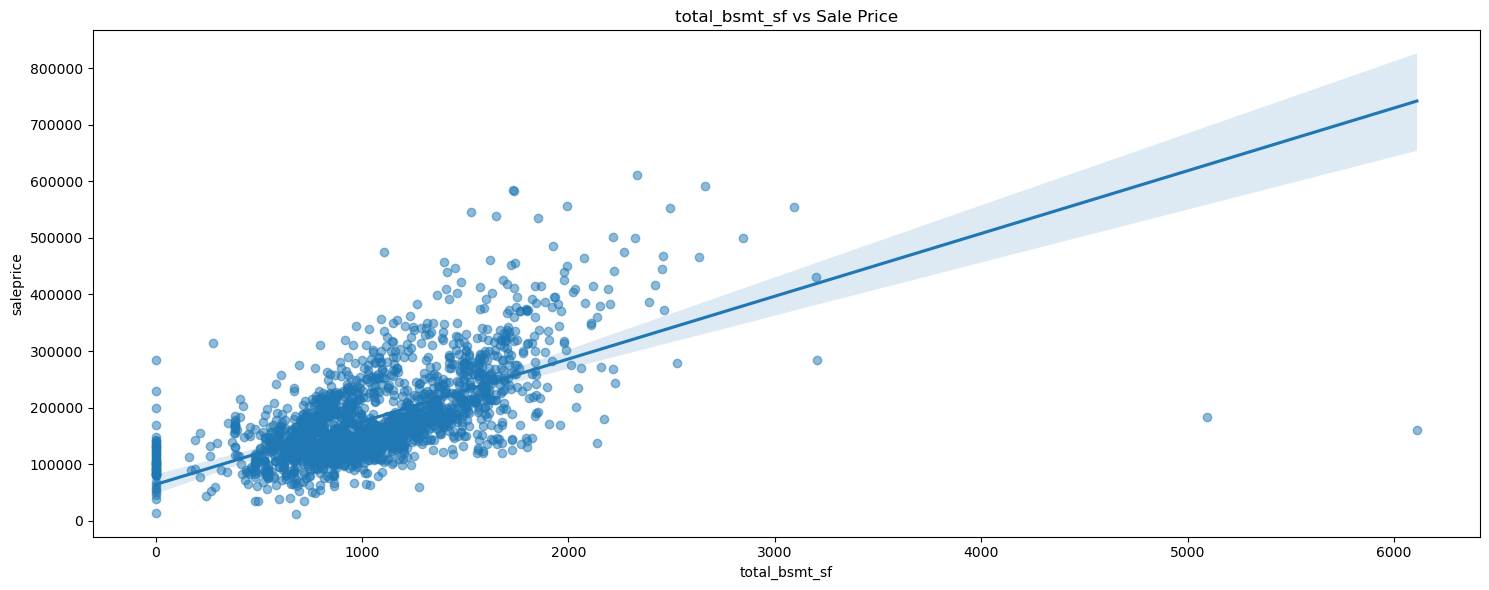

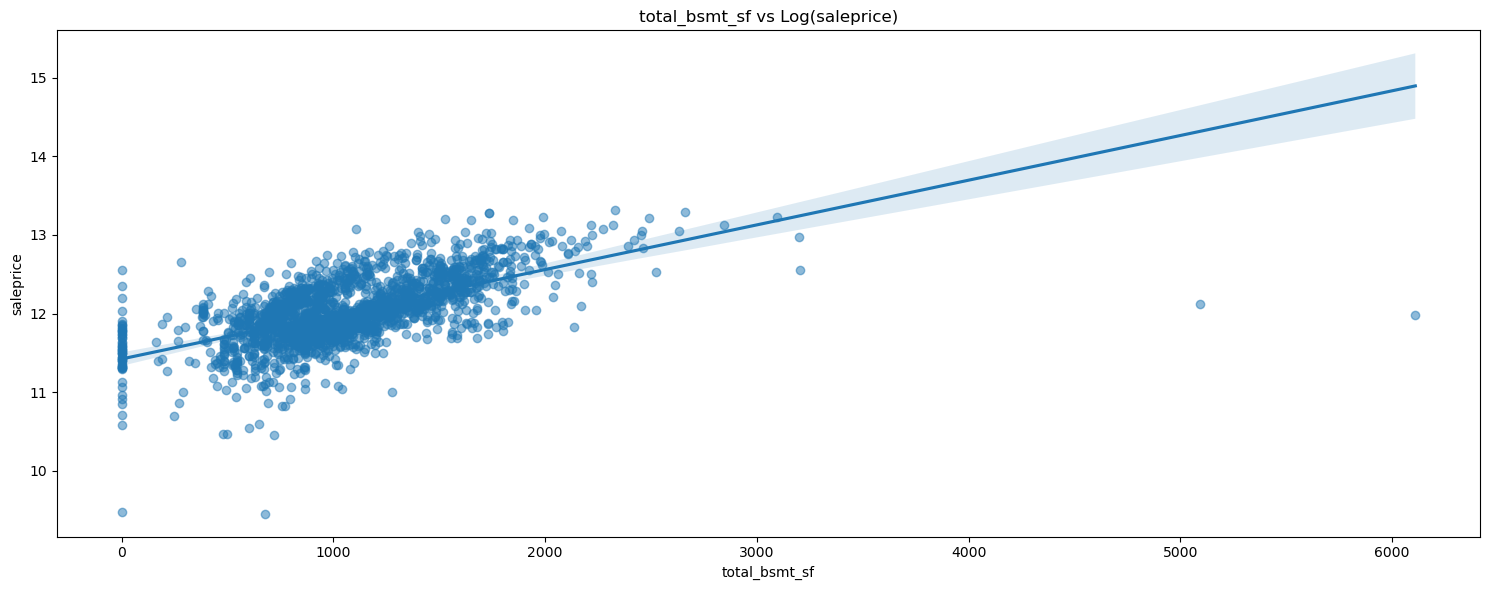

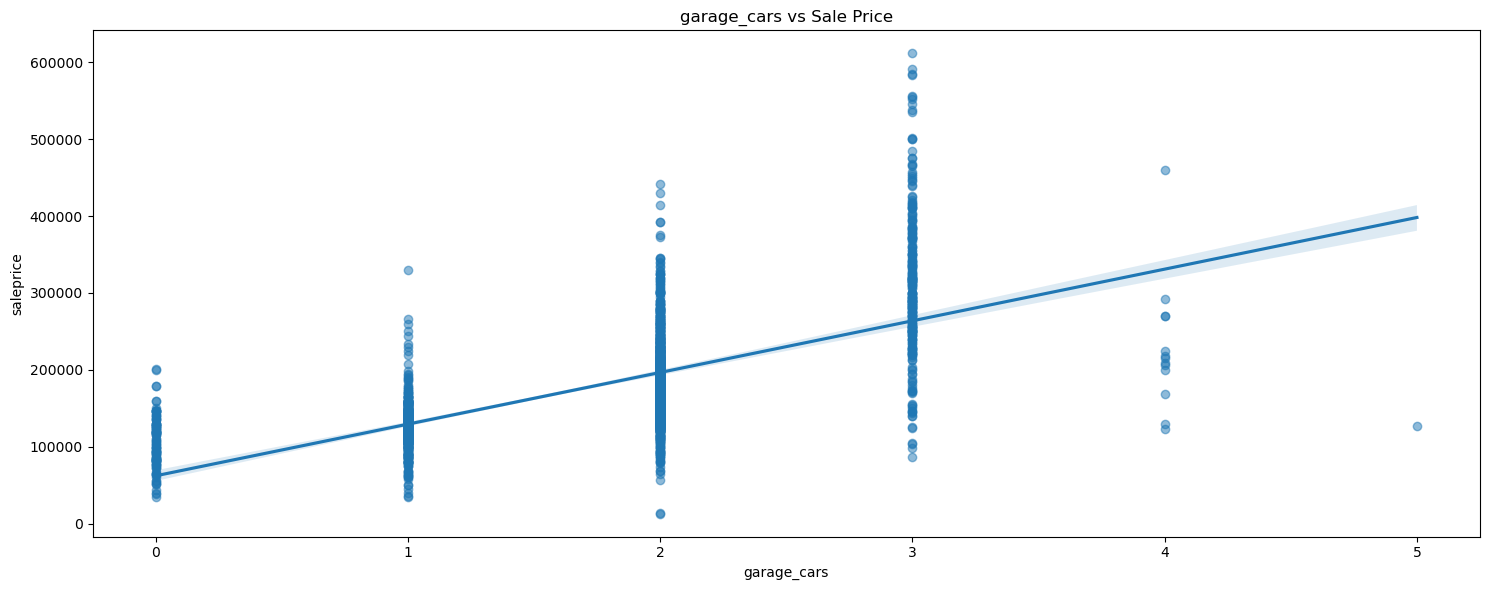

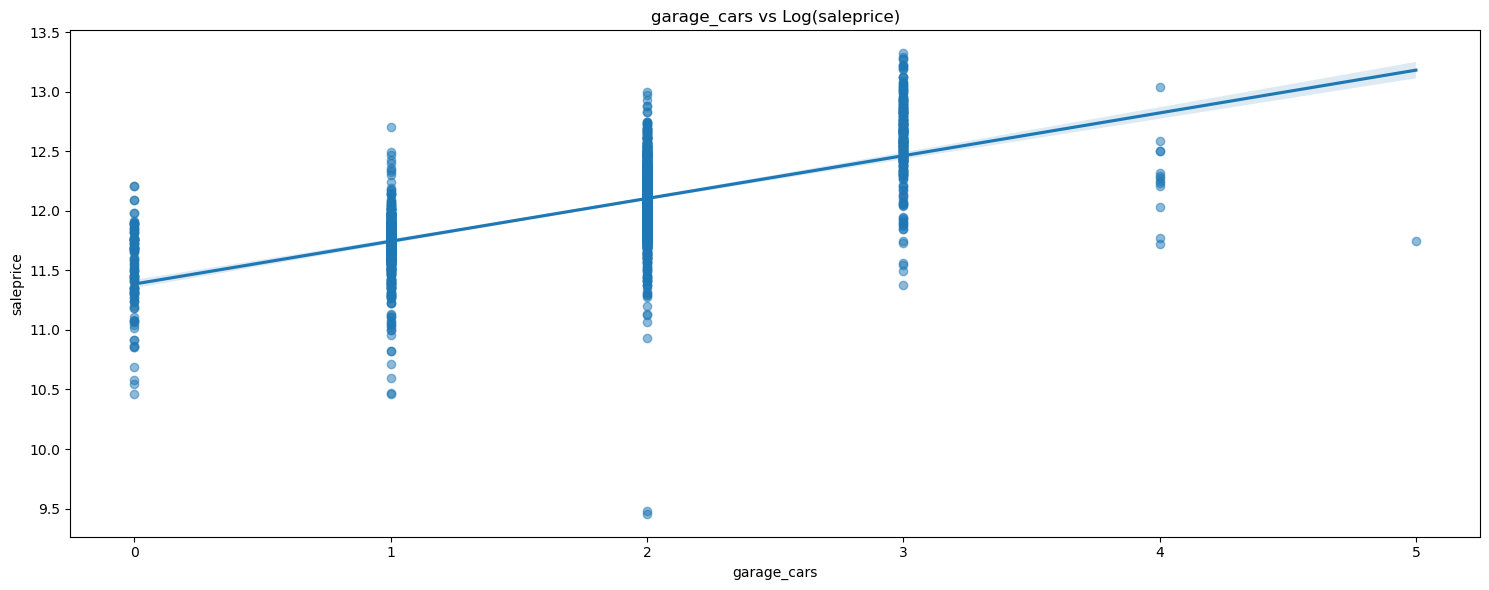

In [27]:
# Function to scatter plots with regression line
def plot_scatter(feature):
    plt.figure(figsize=(15,6))
    sns.regplot(x=feature, y='saleprice', data=train, scatter_kws={'alpha':0.5})
    plt.title(f'{feature} vs Sale Price')
    plt.tight_layout()
    plt.show()

    # Checking if log transformation improves linearity
    plt.figure(figsize=(15,6))
    sns.regplot(x=feature, y=np.log1p(train['saleprice']), data=train, scatter_kws={'alpha':0.5})
    plt.title(f'{feature} vs Log(saleprice)')
    plt.tight_layout()
    plt.show()

# Plot key numeric features
important_numerics = ['overall_qual', 'gr_liv_area', 'total_bsmt_sf', 'garage_cars']
for feature in important_numerics:
    plot_scatter(feature)

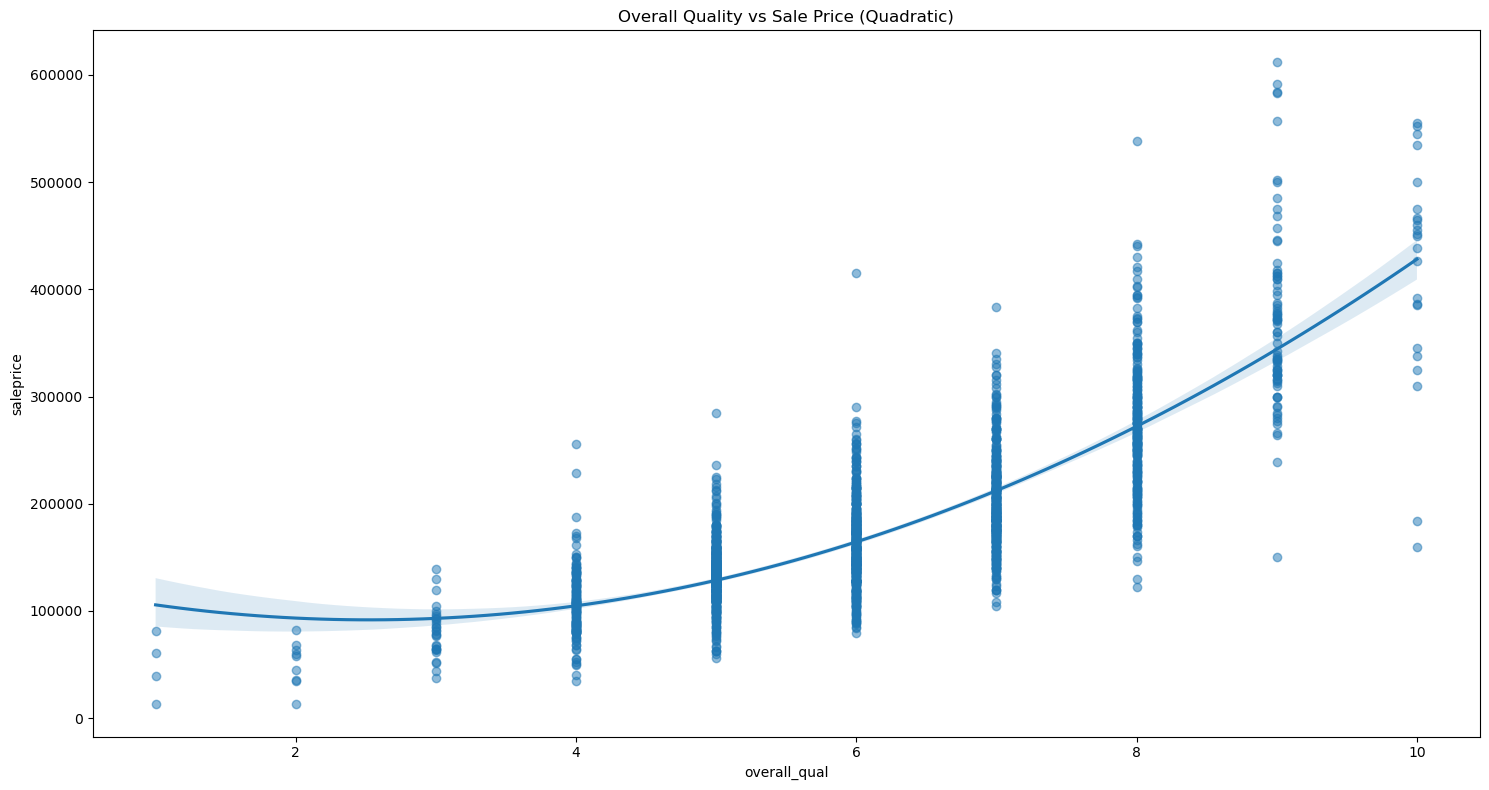

In [28]:
# Checking non-linear relationships
plt.figure(figsize=(15,8))
sns.regplot(x='overall_qual', y='saleprice', data=train,
           scatter_kws={'alpha':0.5}, order=2) #polynomial order 2
plt.title('Overall Quality vs Sale Price (Quadratic)')
plt.tight_layout()
plt.show()

**Findings**
- Overall Quality shows non-linear relationship with price (quadratic)
- Ground Living Area shows hetereoscedasticity (increasing variance)
- Total Basement Square Feet needs log transformation for more linear relationship
- several outliers identified in feature-price relationships

## 7. Missing Value Patterns

<Figure size 2000x1000 with 0 Axes>

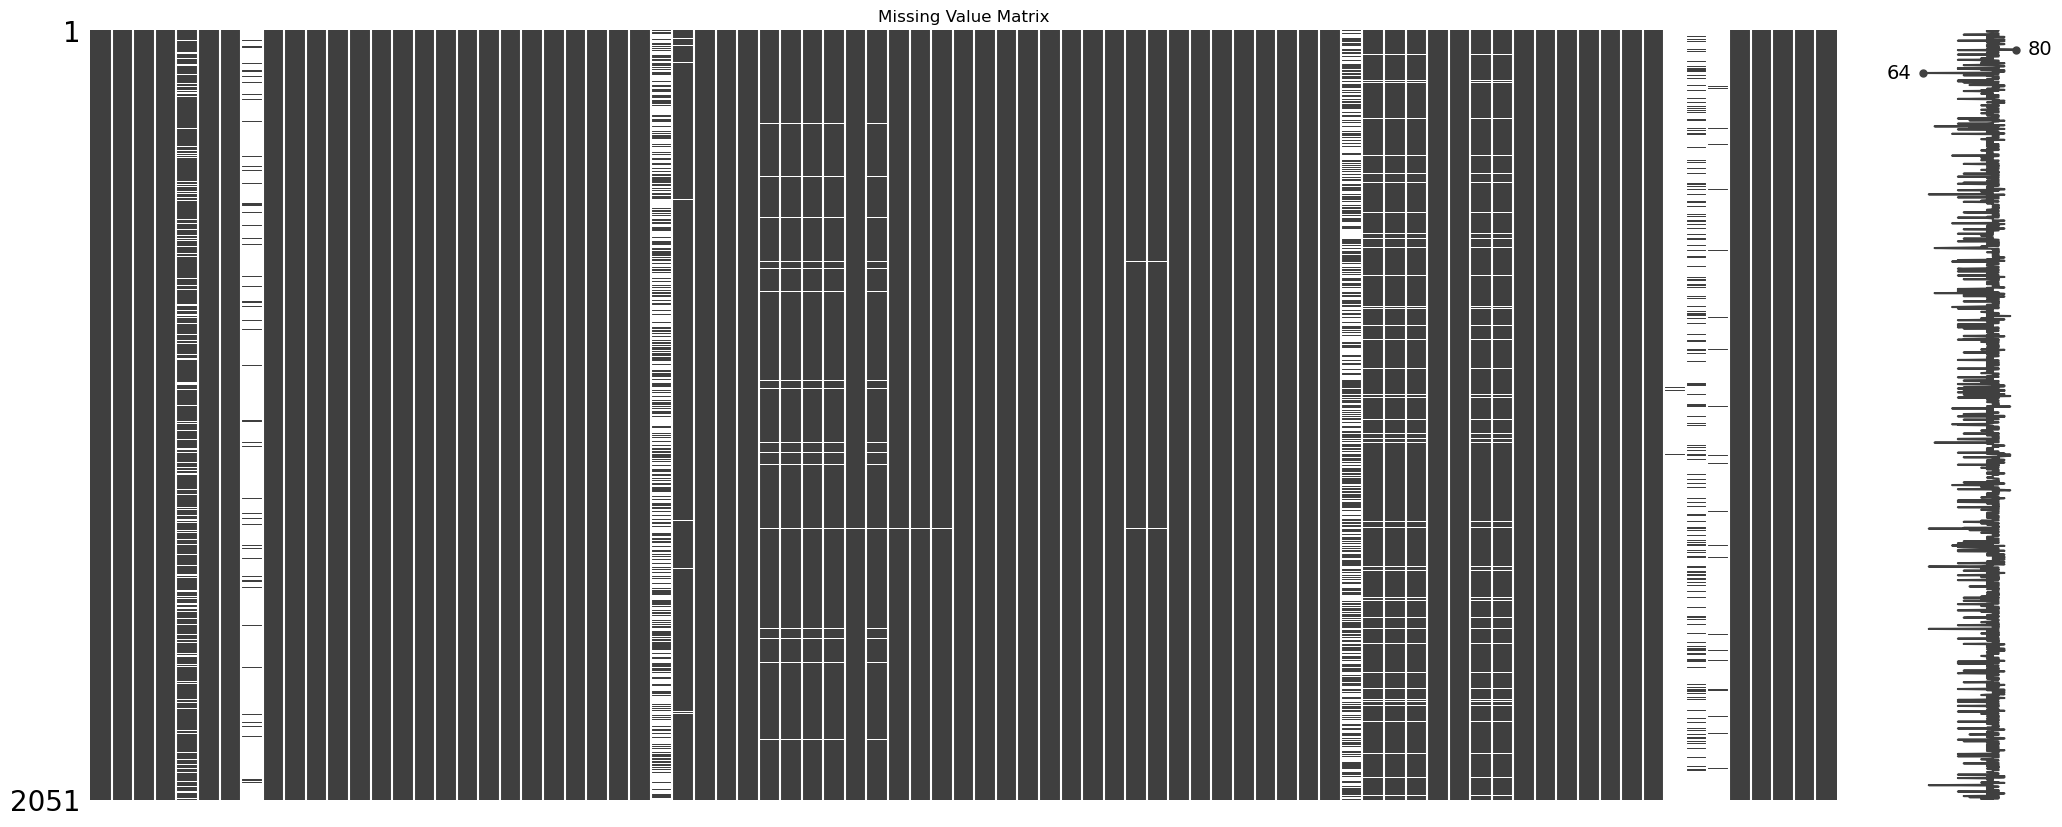

In [29]:
plt.figure(figsize=(20,10))
msno.matrix(train)
plt.title('Missing Value Matrix')
plt.show()

In [30]:
# Checking if missing values affect Sale Price
def missing_value_impact(feature):
    if train[feature].isnull().sum() > 0:
        # Get values for homes with and without the features
        has_feature_prices = train[~train[feature].isnull()]['saleprice']
        missing_feature_prices = train[train[feature].isnull()]['saleprice']

        # Calculate means
        has_feature_mean = has_feature_prices.mean()
        missing_feature_mean = missing_feature_prices.mean()
        
        print(f'{feature}')
        print(f'  Average price with feature: ${has_feature_mean:.2f}')
        print(f'  Average price without feature: ${missing_feature_mean:.2f}')
        print(f'  Difference: ${has_feature_mean - missing_feature_mean:.2f}')
        print(f"  Count with feature: {len(has_feature_prices)}")
        print(f"  Count without feature: {len(missing_feature_prices)}")
        
        # Only run T-test if we have enough data in both groups
        if len(has_feature_prices) > 1 and len(missing_feature_prices) > 1:
            # Run the T-test
            t_stat, p_value = stats.ttest_ind(
                has_feature_prices,
                missing_feature_prices,
                equal_var=False  # Welch's t-test doesn't assume equal variance
            )
            print(f"  T-test: t-statistic = {t_stat:.2f}, p-value = {p_value:.6f}")
        else:
            print("  T-test: Not enough data in both groups for statistical comparison")


# Check for a few features with missing values
for feature in ['lot_frontage', 'bsmt_qual', 'garage_cars']:
    if train[feature].isnull().sum() > 0:
        missing_value_impact(feature)

lot_frontage
  Average price with feature: $180198.65
  Average price without feature: $188098.40
  Difference: $-7899.75
  Count with feature: 1721
  Count without feature: 330
  T-test: t-statistic = -2.07, p-value = 0.039337
bsmt_qual
  Average price with feature: $183539.87
  Average price without feature: $106341.35
  Difference: $77198.53
  Count with feature: 1996
  Count without feature: 55
  T-test: t-statistic = 12.43, p-value = 0.000000
garage_cars
  Average price with feature: $181484.61
  Average price without feature: $150909.00
  Difference: $30575.61
  Count with feature: 2050
  Count without feature: 1
  T-test: Not enough data in both groups for statistical comparison


**Findings**
- Features like Alley, PoolQC  missing because feature doesn't exist (not at random)
- Lot Frontage missing values better handled by neighborhood median
- Basement features missing together, indicating no basement

## 8. Feature Interaction - Multiplying Features

### 1.1 **Quality Area** = Overall Quality x Ground Living Area

How the Quality of the Ground Living Area interacts with Sale Price

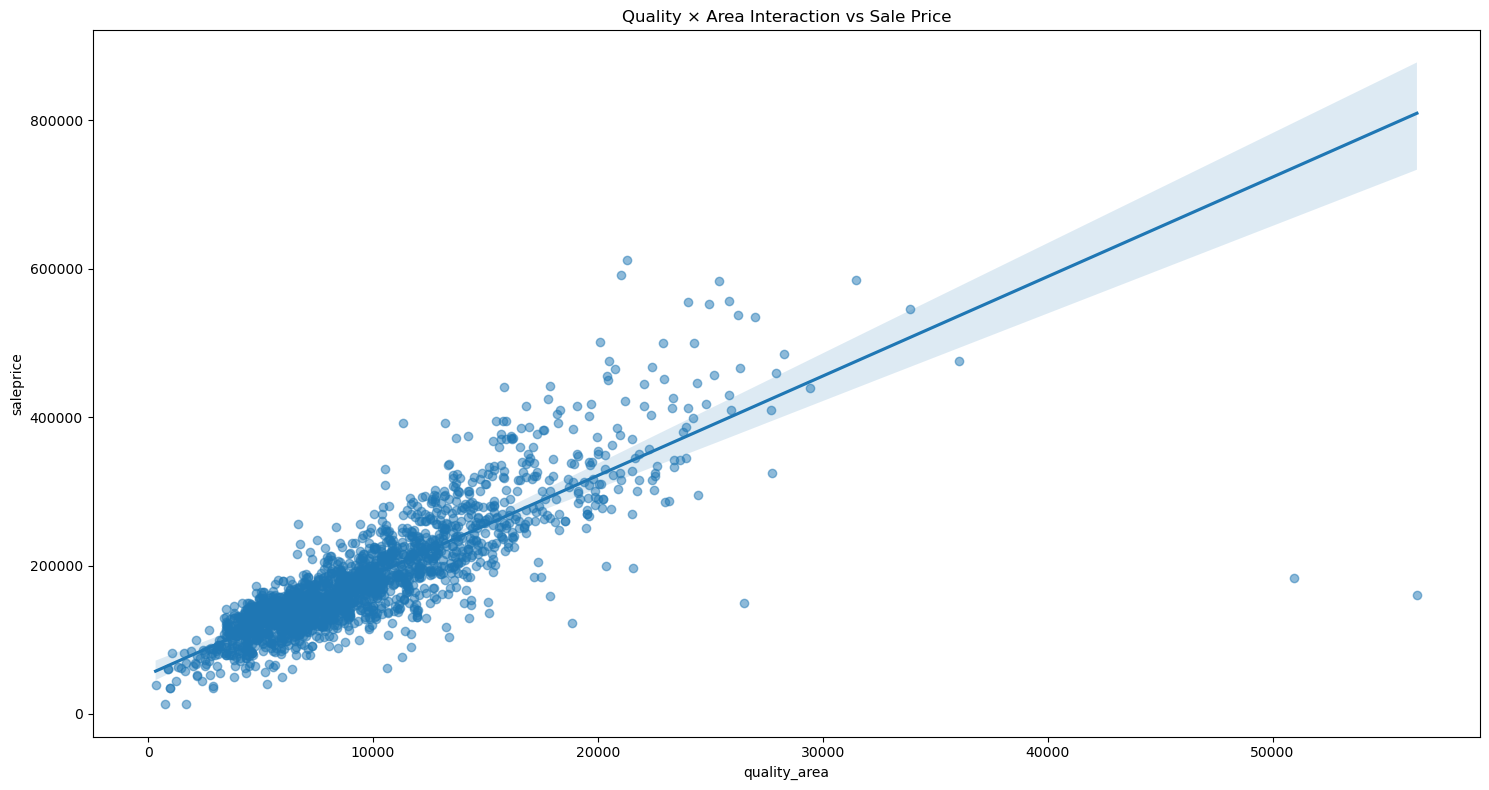

Original Overall Qual correlation: 0.8002068702531383
Original Gr Liv Area correlation: 0.6970384443056634
Quality × Area interaction correlation: 0.8371521515584832


In [36]:
# Creating interaction terms
train['quality_area'] = train['overall_qual'] * train['gr_liv_area']
train['quality_cond'] = train['overall_qual'] * train['overall_cond']

# Visualize interactions
plt.figure(figsize=(15, 8))
sns.regplot(x='quality_area', y='saleprice', data=train, scatter_kws={'alpha':0.5})
plt.title('Quality × Area Interaction vs Sale Price')
plt.tight_layout()
plt.show()

# Checking improvements in correlation
print("Original Overall Qual correlation:", train['overall_qual'].corr(train['saleprice']))
print("Original Gr Liv Area correlation:", train['gr_liv_area'].corr(train['saleprice']))
print("Quality × Area interaction correlation:", train['quality_area'].corr(train['saleprice']))

### 1.2 **Overall Quality vs Price by Neighborhoods**
- How Overall Quality interacts with Price by Neighborhood

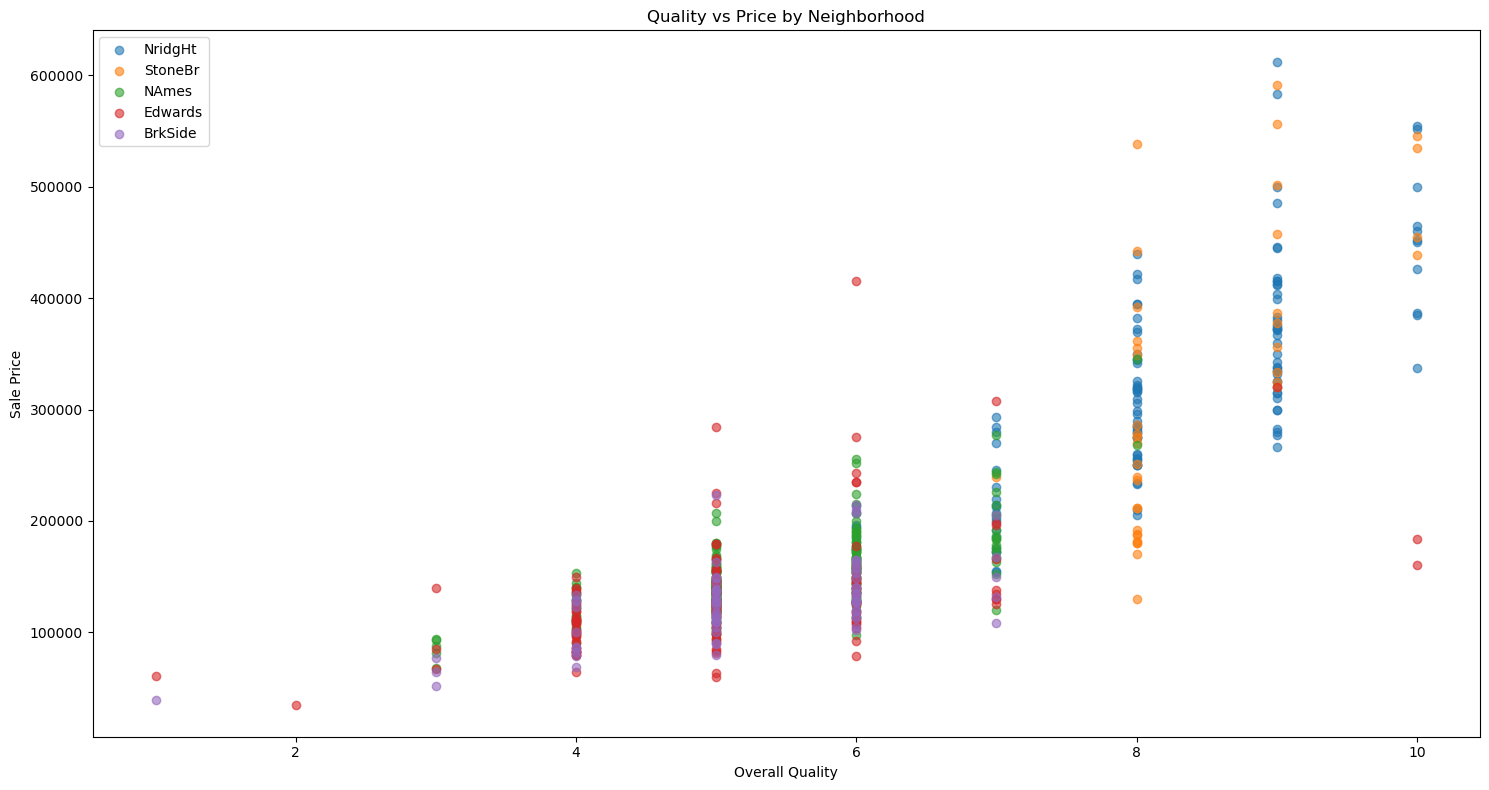

In [37]:
# Checking neighborhood interaction
plt.figure(figsize=(15, 8))
neighborhoods = ['NridgHt', 'StoneBr', 'NAmes', 'Edwards', 'BrkSide']  # Example neighborhoods
for neighborhood in neighborhoods:
    subset = train[train['neighborhood'] == neighborhood]
    plt.scatter(subset['overall_qual'], subset['saleprice'], alpha=0.6, label=neighborhood)

plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Quality vs Price by Neighborhood')
plt.legend()
plt.tight_layout()
plt.show()

### 1.3 **Age Condition** = House Age x Overall Condition

How Age Condition interacts with Sale Price

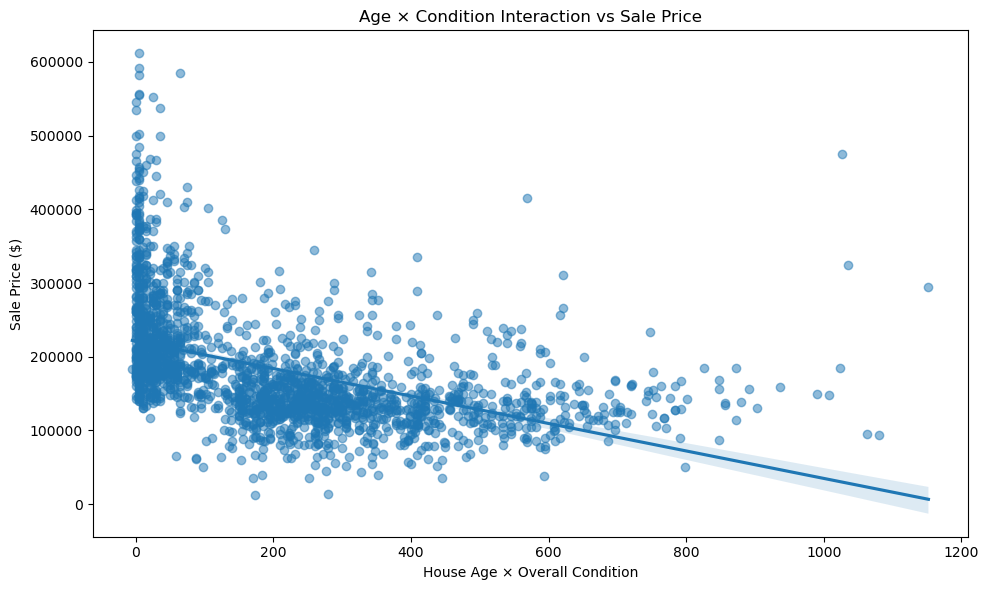

House Age correlation: -0.5718812481814429
Overall Condition correlation: -0.0970189127360913
Age × Condition interaction correlation: -0.47016264317966666


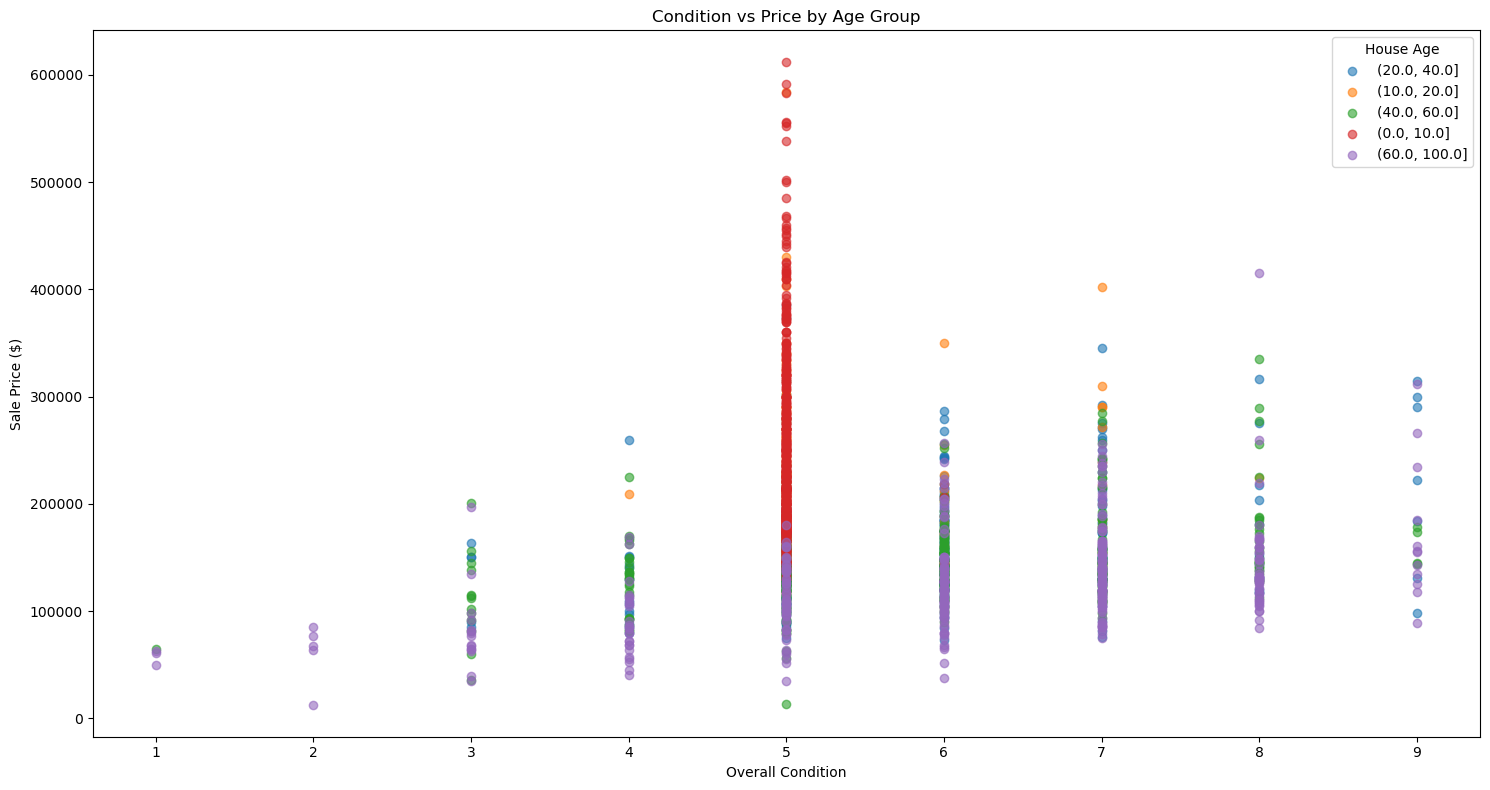

In [38]:
# Creating Age × Condition interaction
train['house_age'] = train['yr_sold'] - train['year_built']
train['age_condition'] = train['house_age'] * train['overall_cond']

# Visualize the Age × Condition interaction
plt.figure(figsize=(10, 6))
sns.regplot(x='age_condition', y='saleprice', data=train, scatter_kws={'alpha':0.5})
plt.title('Age × Condition Interaction vs Sale Price')
plt.xlabel('House Age × Overall Condition')
plt.ylabel('Sale Price ($)')
plt.tight_layout()
plt.show()

# Check how this interaction correlates with price compared to individual components
print("House Age correlation:", train['house_age'].corr(train['saleprice']))
print("Overall Condition correlation:", train['overall_cond'].corr(train['saleprice']))
print("Age × Condition interaction correlation:", train['age_condition'].corr(train['saleprice']))

# Check how this interaction works across different age groups
plt.figure(figsize=(15, 8))
age_bins = [0, 10, 20, 40, 60, 100]
train['age_group'] = pd.cut(train['house_age'], bins=age_bins)

for age_group in train['age_group'].unique():
    subset = train[train['age_group'] == age_group]
    if len(subset) > 10:  # Only plot if enough data points
        plt.scatter(subset['overall_cond'], subset['saleprice'], alpha=0.6, label=str(age_group))
    
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price ($)')
plt.title('Condition vs Price by Age Group')
plt.legend(title='House Age')
plt.tight_layout()
plt.show()

**Findings**
- Quality x Area interaction significant (high-quality, large homes command premium)
- Neighborhood x Quality interaction suggests different quality premiums by location
- Age x Condition interaction shows newer homes in good condition valued higher

## 9. Ordinal Feature Analysis

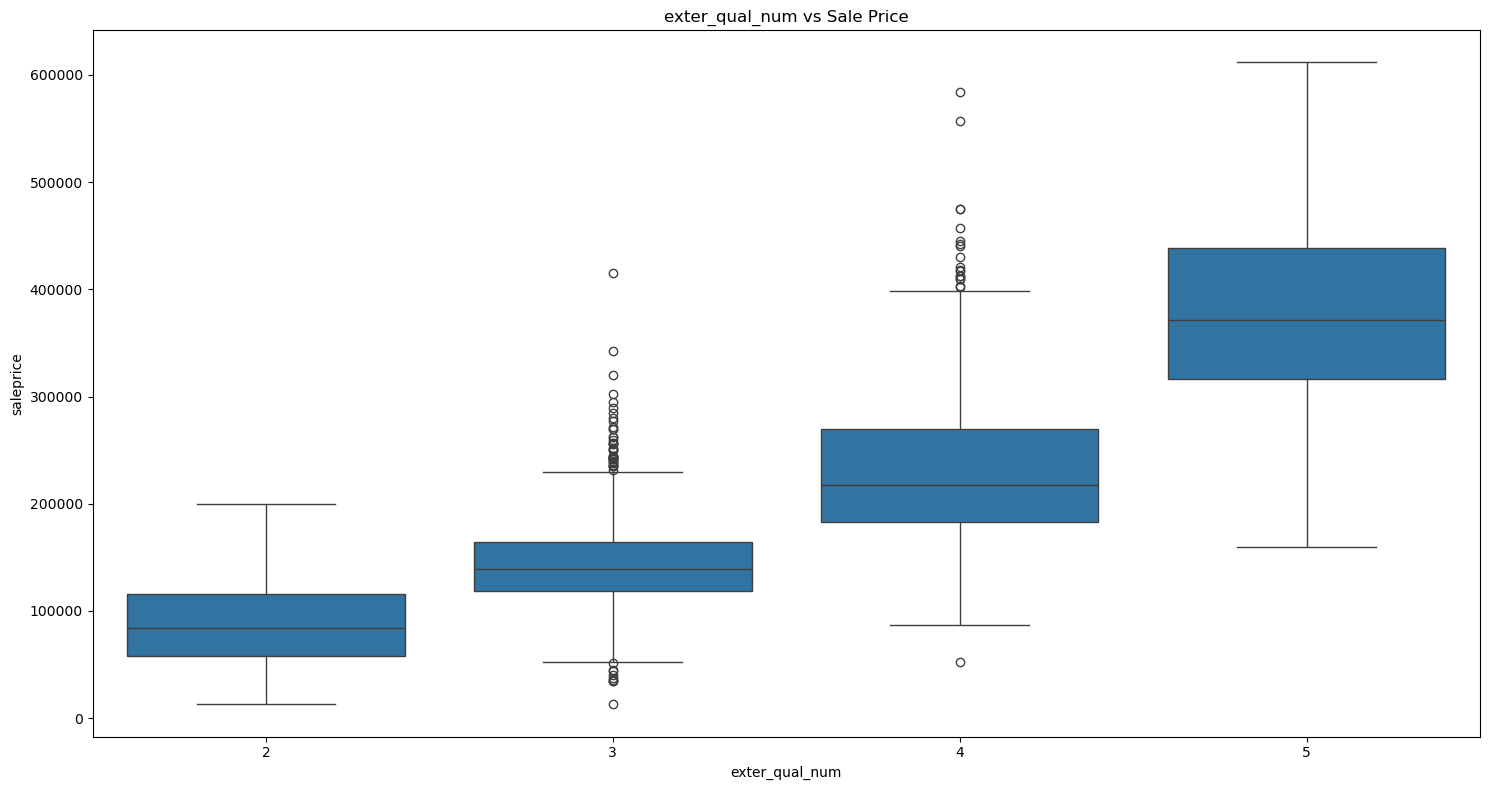

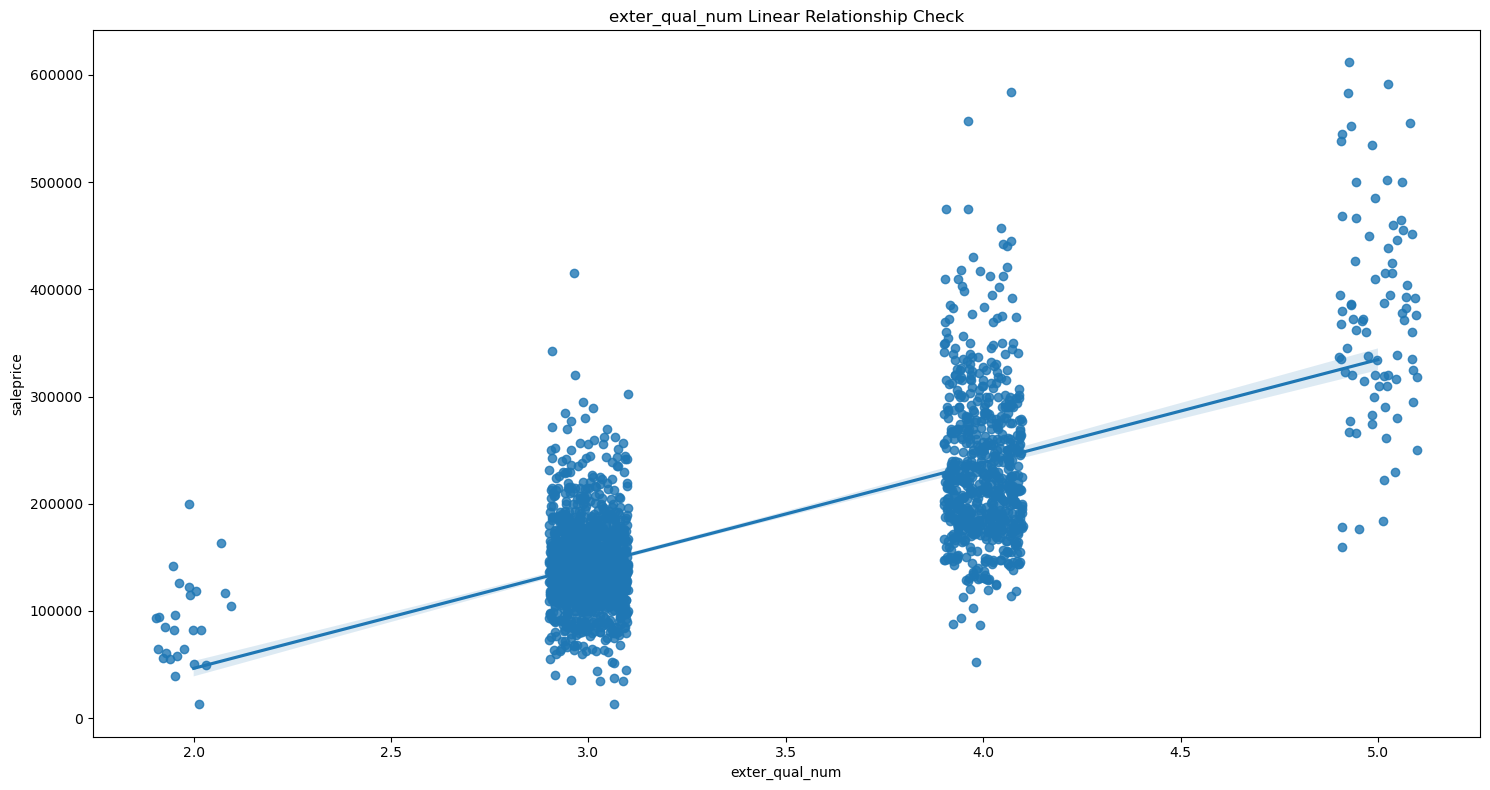

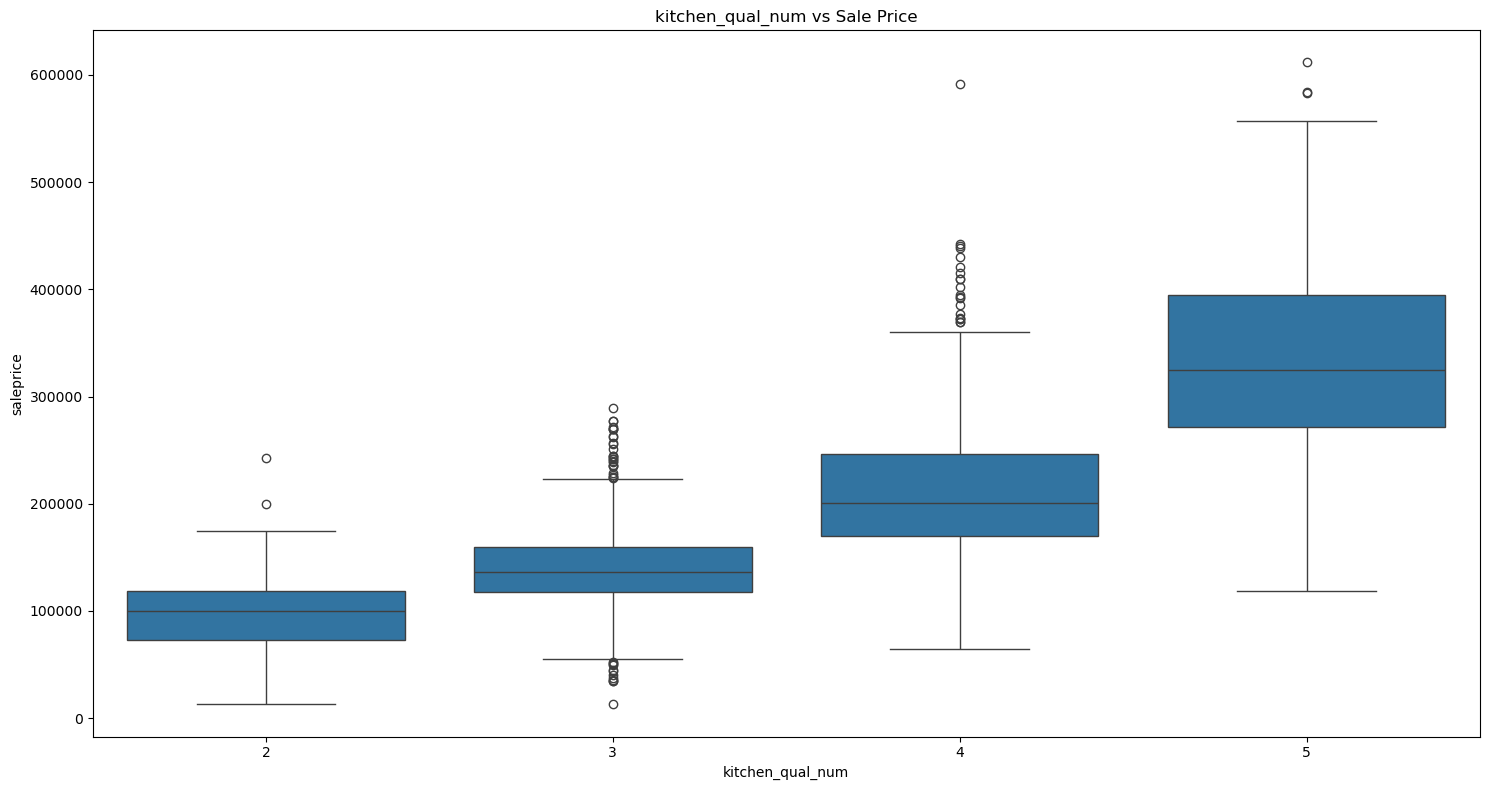

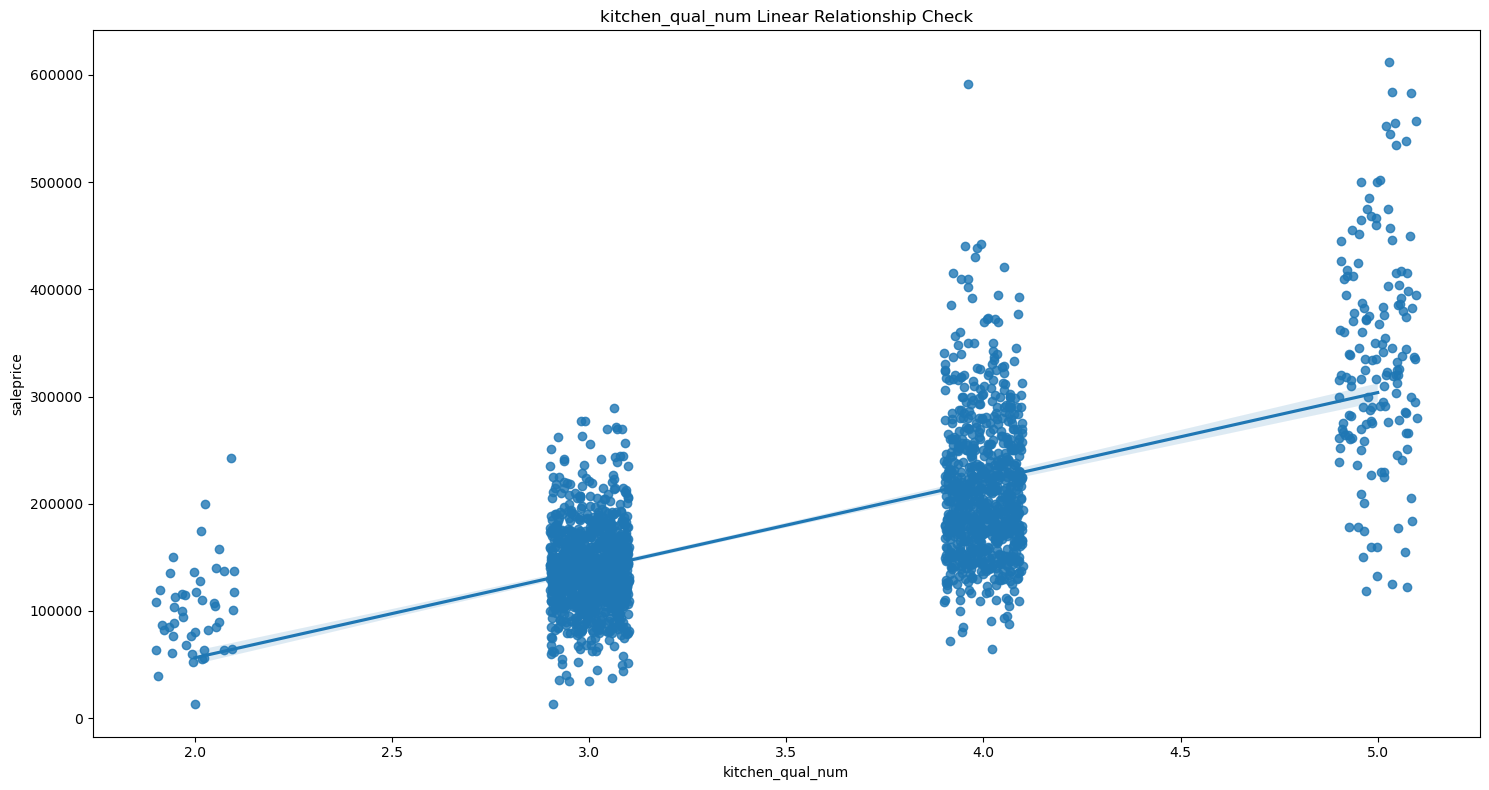

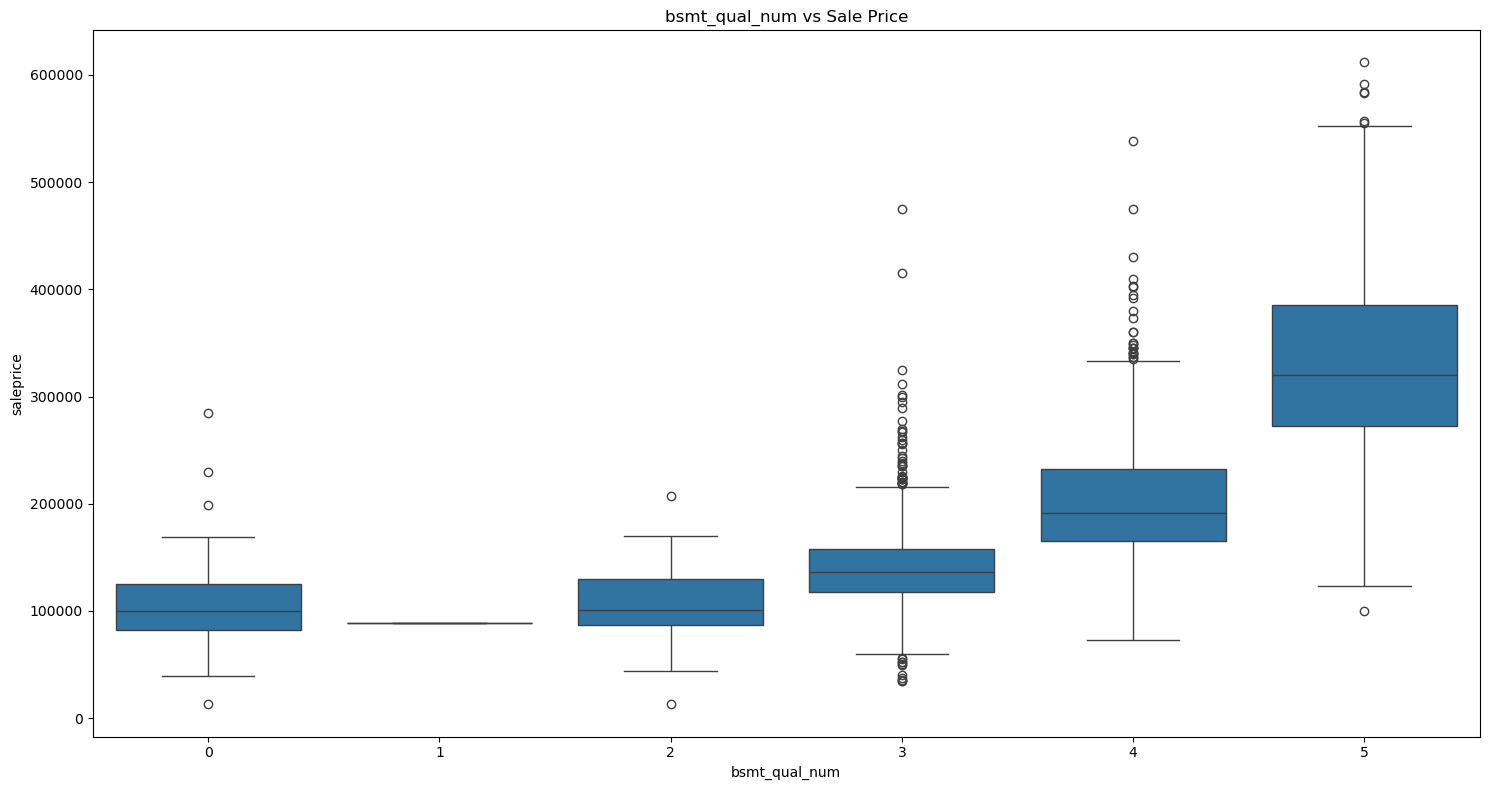

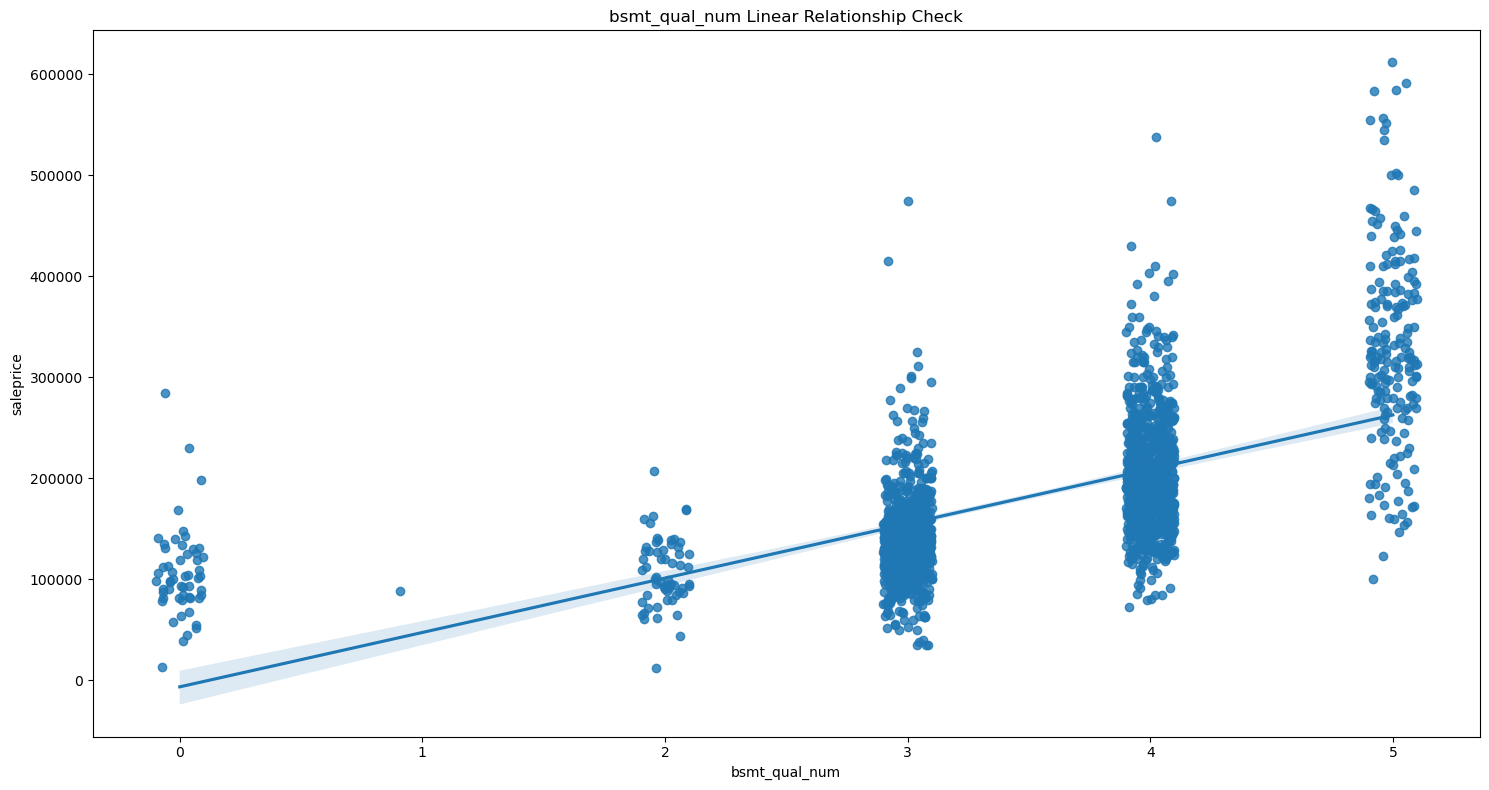

In [31]:
# Convert ordinal features to numeric
qual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}

train['exter_qual_num'] = train['exter_qual'].map(qual_map)
train['kitchen_qual_num'] = train['kitchen_qual'].map(qual_map)
train['bsmt_qual_num'] = train['bsmt_qual'].map(lambda x: qual_map.get(x, 0))

# Visualize numeric conversion
for feature in ['exter_qual_num', 'kitchen_qual_num', 'bsmt_qual_num']:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x=feature, y='saleprice', data=train)
    plt.title(f'{feature} vs Sale Price')
    plt.tight_layout()
    plt.show()
    
    # Check linearity
    plt.figure(figsize=(15, 8))
    sns.regplot(x=feature, y='saleprice', data=train, x_jitter=0.1)
    plt.title(f'{feature} Linear Relationship Check')
    plt.tight_layout()
    plt.show()

### 8.1 Squared Terms for Non-linear Realationship of Overall Quality and Sale Price

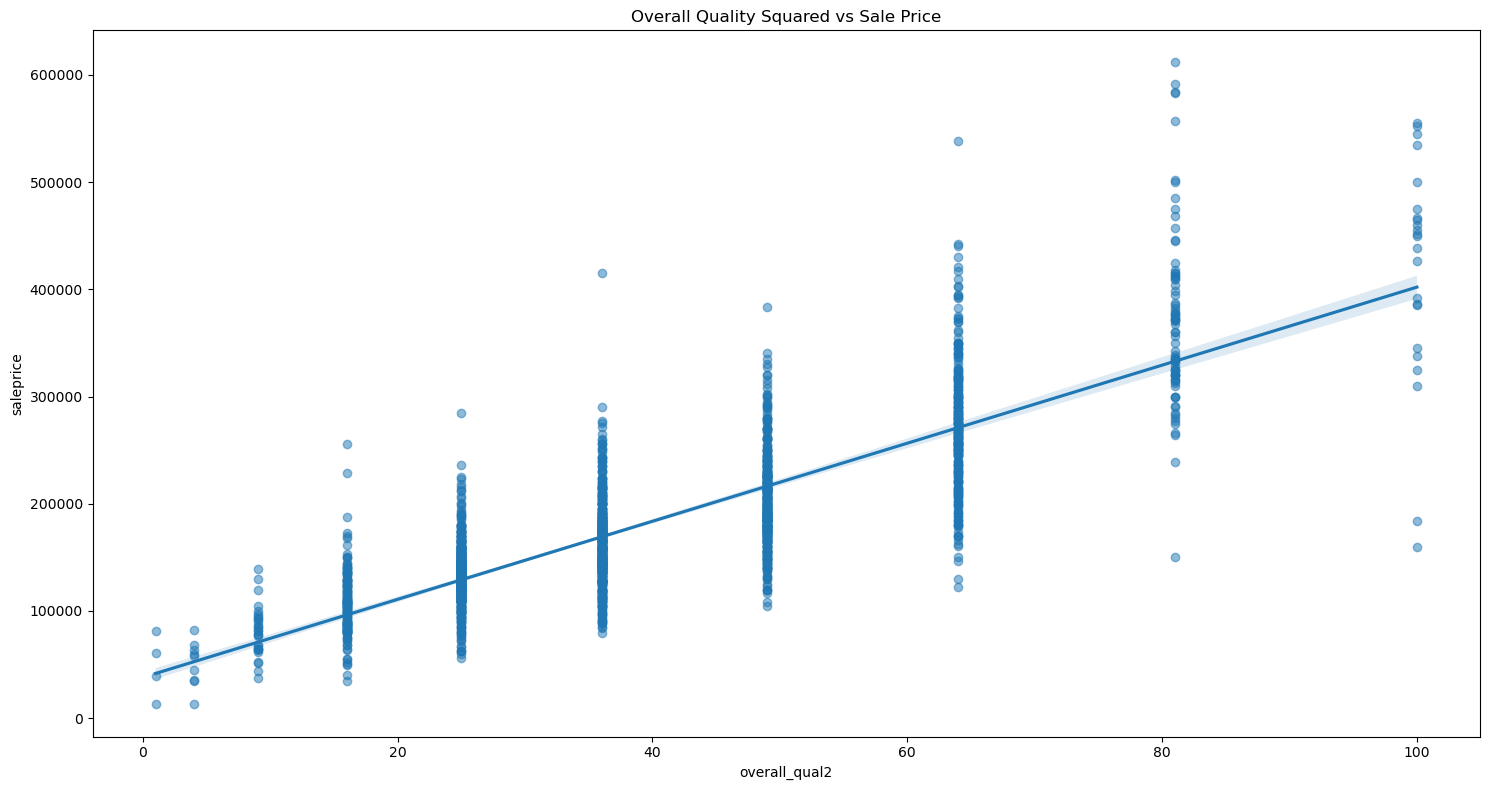

Original correlation: 0.8002068702531383
Squared term correlation: 0.8255394107310741


In [35]:
# Analysis of squared terms for non-linear relationships
train['overall_qual2'] = train['overall_qual']**2

plt.figure(figsize=(15, 8))
sns.regplot(x='overall_qual2', y='saleprice', data=train, scatter_kws={'alpha':0.5})
plt.title('Overall Quality Squared vs Sale Price')
plt.tight_layout()
plt.show()

print('Original correlation:', train['overall_qual'].corr(train['saleprice']))
print('Squared term correlation:', train['overall_qual2'].corr(train['saleprice']))

**Findings**
- Most quality metrics (exter_qual, kitchen_qual) show roughly linear relationship after conversion
- Overall Quality shows stronger effect at high end (suggesting squared term)

## 9. Which features to keep? Multicolinearity Assessment

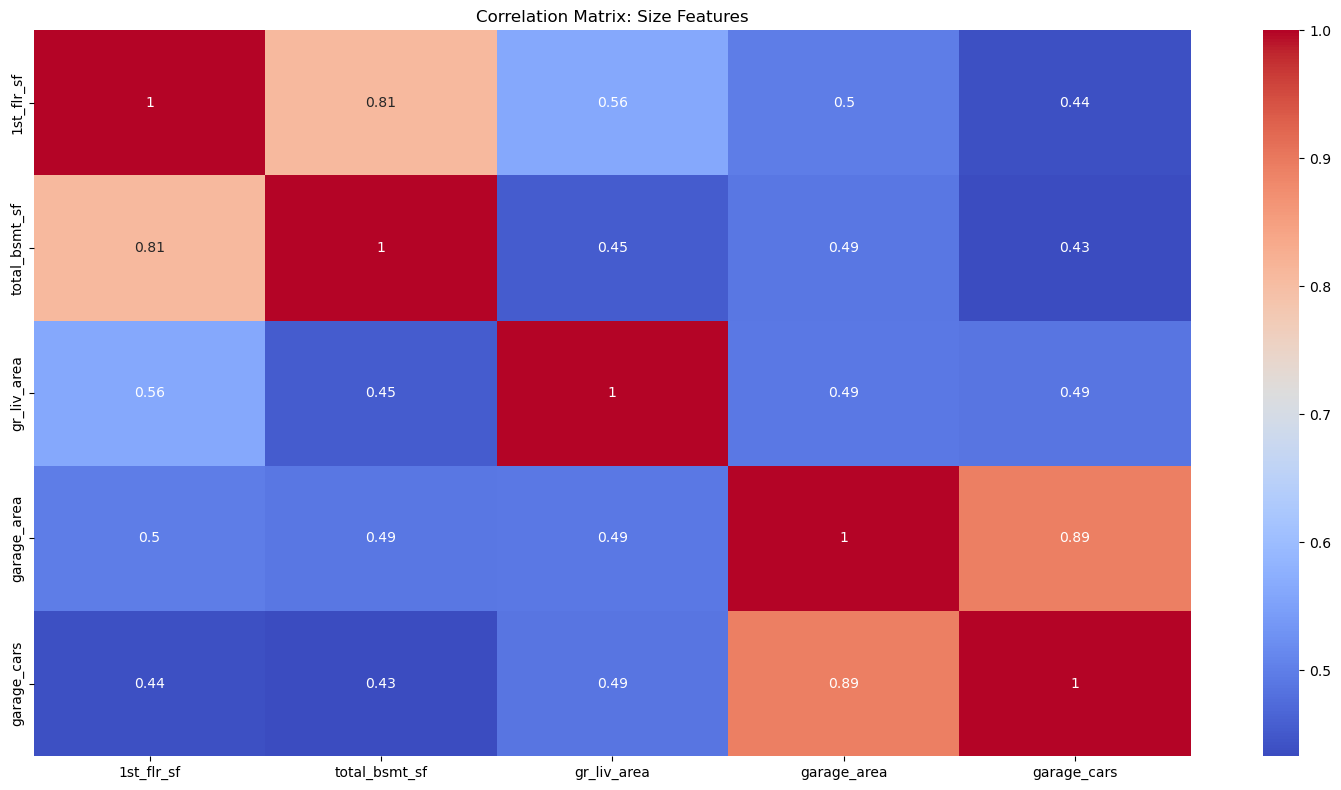

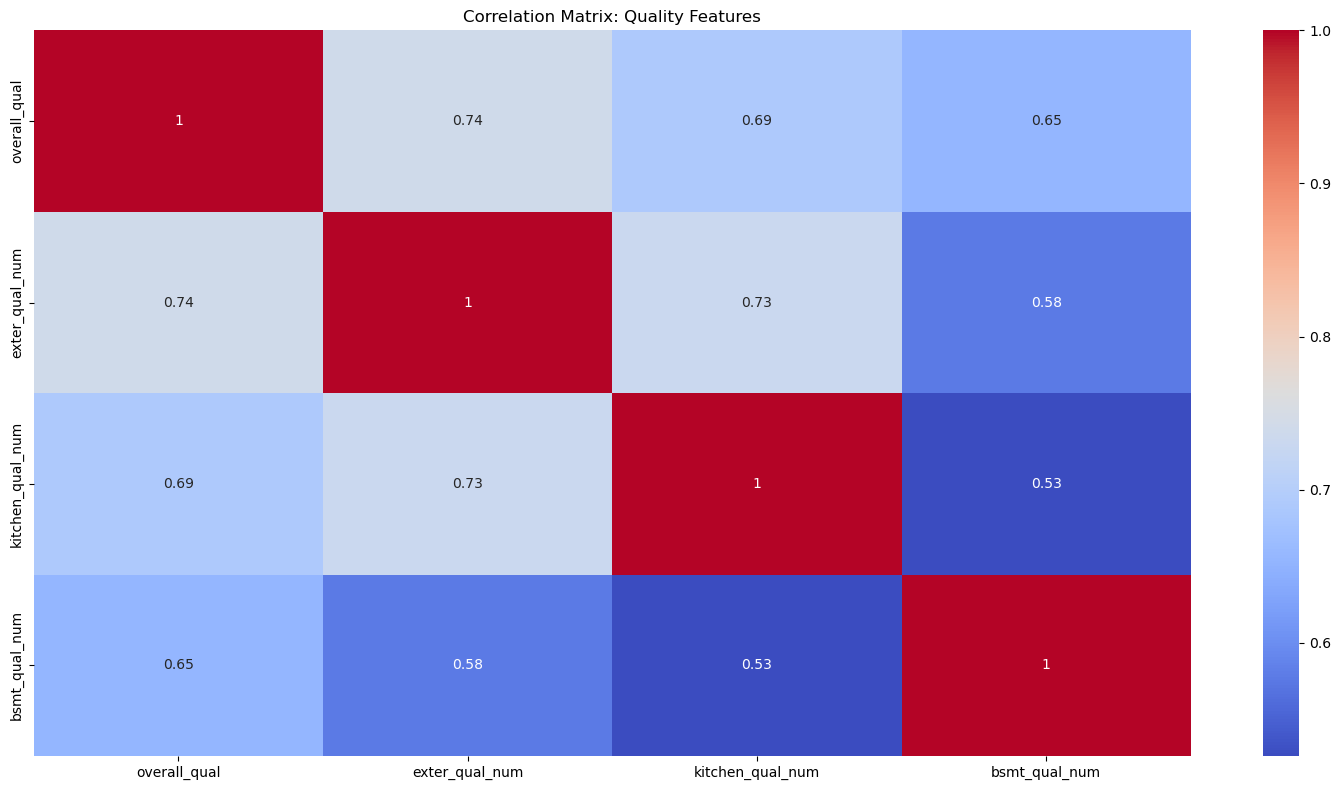

Variance Inflation Factor (VIF) for size features:
        Variable        VIF
4    garage_cars  31.263461
3    garage_area  30.853668
0     1st_flr_sf  29.915164
1  total_bsmt_sf  19.419505
2    gr_liv_area  14.087269
VIF for quality features:
           Variable        VIF
1    exter_qual_num  79.873524
2  kitchen_qual_num  65.017757
0      overall_qual  55.214157
3     bsmt_qual_num  28.741589


In [33]:
# Correlation matrix for potential multicollinearity
size_features = ['1st_flr_sf', 'total_bsmt_sf', 'gr_liv_area', 'garage_area', 'garage_cars']
quality_features = ['overall_qual', 'exter_qual_num', 'kitchen_qual_num', 'bsmt_qual_num']

plt.figure(figsize=(15, 8))
sns.heatmap(train[size_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Size Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.heatmap(train[quality_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Quality Features')
plt.tight_layout()
plt.show()

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(features):
    X = train[features].fillna(0)  # Simple imputation for demonstration
    vif = pd.DataFrame()
    vif["Variable"] = features
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif.sort_values('VIF', ascending=False)

print("Variance Inflation Factor (VIF) for size features:")
print(calculate_vif(size_features))

print("VIF for quality features:")
print(calculate_vif(quality_features))

**Findings**
- Several size measurements highly correlated (1st_flr_sf, total_bsmt_sf, gr_liv_area)
- Garage measures correlated (garage_cars, garage_area)

## 8. Data Cleaning

In [156]:
def clean_data(df):
    result = df.copy()
    result.columns = result.columns.str.lower().str.replace(' ','_')
    
    # Fill missing values for specific columns with appropriate strategies
    
    # LotFrontage: Fill with median by neighborhood
    result['lot_frontage'] = result.groupby('neighborhood')['lot_frontage'].transform(
        lambda x: x.fillna(x.median()) if not pd.isna(x.median()) else x.fillna(result['lot_frontage'].median())
    )
    
    # For features where NA means "None" or "Not present"
    na_means_none = [
        'alley', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 
        'bsmtfin_type_2', 'fireplace_qu', 'garage_type', 'garage_finish', 
        'garage_qual', 'garage_cond', 'pool_qc', 'fence', 'misc_feature', 'mas_vnr_type'
    ]
    
    for col in na_means_none:
        if col in result.columns and result[col].isna().any():
            result[col] = result[col].fillna('None')
    
    # Fill Garage Year Built with Year Built if missing
    if 'garage_yr_blt' in result.columns and result['garage_yr_blt'].isna().any():
        result.loc[result['garage_yr_blt'].isna(), 'garage_yr_blt'] = result.loc[result['garage_yr_blt'].isna(), 'year_built']
    
    # For Masonry Veneer Area, fill with 0 if missing
    if 'mas_vnr_area' in result.columns and result['mas_vnr_area'].isna().any():
        result['mas_vnr_area'] = result['mas_vnr_area'].fillna(0)
    
    # For other numeric basement features, fill with 0 if missing
    basement_nums = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath']
    for col in basement_nums:
        if col in result.columns and result[col].isna().any():
            result[col] = result[col].fillna(0)
    
    # For other categorical features, fill with most frequent value
    for col in result.select_dtypes(include=['object']).columns:
        if col not in na_means_none and result[col].isna().any():
            result[col] = result[col].fillna(result[col].mode()[0])
    
    # For other numeric features, fill with median
    for col in result.select_dtypes(include=['int64', 'float64']).columns:
        if col not in basement_nums and col != 'mas_vnr_area' and col != 'garage_yr_blt' and col != 'lot_frontage' and result[col].isna().any():
            result[col] = result[col].fillna(result[col].median())
    
    return result

# Applying cleaning function
train_cleaned = clean_data(train)
test_cleaned = clean_data(test)

In [157]:
# Checking if cleaning was successful
train_missing_after = train_cleaned.isnull().sum()[train_cleaned.isnull().sum() > 0]
test_missing_after = test_cleaned.isnull().sum()[test_cleaned.isnull().sum() > 0]

print("=== Missing Values After Cleaning ===")
if train_missing_after.empty:
    print("No missing values in training set after cleaning.")
else:
    print("Remaining missing values in training set:")
    print(train_missing_after)

if test_missing_after.empty:
    print("No missing values in test set after cleaning.")
else:
    print("Remaining missing values in test set:")
    print(test_missing_after)

=== Missing Values After Cleaning ===
No missing values in training set after cleaning.
No missing values in test set after cleaning.


In [159]:
# Saving cleaned datasets for the next notebook
train_cleaned.to_csv('../data/train_cleaned.csv', index=False)
test_cleaned.to_csv('../data/test_cleaned.csv', index=False)
print("Cleaned datasets saved successfully!")

Cleaned datasets saved successfully!
